<h1 align="center"> The Impact of Medicine to your Wallet </h1>
<img src="https://www.toonpool.com/user/1631/files/expensive_health_care_898485.jpg" width=600>

<h3>Before Starting: </h3>
As in other projects, your upvotes really mean a lot to me because it tells me that Kagglers are interested in the work I am proving to you guys. So I will appreciate if you could upvote this kernel if you enjoy the work I do. Looking to share some insights with Kagglers in the comment section. Also, if updates take longer than usual it is because of work at school nevertheless, I'll try to bring more interesting updates with regards to this project. Hope you enjoy the analysis!

<h3> Brief Introduction </h3>
In this project, my main aim is to show ways to go deep into the data story-telling even though the dataset is small. Also, I will work on a model that could give us an approximation as to what will be the charges of the patients. Nevertheless, we must go deeply into what factors influenced the charge of a specific patient. In order to do this we must look for patterns in our data analysis and gain extensive insight of what the data is telling us.  Lastly, we will go step by step to understand the story behind the patients in this dataset only through this way we could have a better understanding of what features will help our model have a closer accuracy to the true patient charge. 


<h3>A Note to my Fellow Kagglers: </h3>
I am still in the process of updating especially in the cluster analysis and multi regression phase. I am aware of the collinearity issue which I will update once I am done implementing and explaining the different types of cluster analysis we could use to determine specific groups within our population. Enjoy! <br><br>

<h3>Table of Contents: </h3>
I. [Importing Libraries](#import)<br>
II. [Distribution of Medical Charges](#distribution)<br>

III. Age Analysis <br>
a) [Turning Age into Categorical Variables](#age_cat)<br>
b) [Is there a relationship between BMI and Age?](#bmi_age)<br>
c) [Comparing Independent Variables with ANOVA](#ANOVA)<br>
d)[Who got charged more on Average by Age](#charged_age)<br><br>

IV. Weight Status <br>
a) [Turning BMI into Categorical Variables](#bmi_cat) <br>
b) [Weight Status vs Charges](#weight_charges) <br>
c) [Obesity and the Impact of Smoking to the Wallet](#obese_smoker)<br>
d)[ Distribution of Charges (Obese Smoker vs Obese non-Smoker)](#obesevsnonobese_smokers)<br>
e) [Separation in Charges between Obese Smokers vs Non-Obese Smokers](#separation)<br><br>

V. Regional Analysis:<br>
a) [Building a Contingency Table](#building_contingency)<br>
b) [Average Patient Charge by Region](#average_region) <br>
c) [Average charge by region depending on weight condition](#charge_condition) <br><br>

VI. Unsupervised Learning Algorithms:<br>
a) [Performing Clustering Manually](#manual_cluster)<br>
b) [K-Means Clustering](#Kmeans)<br>
c) [Hierarchical Clustering](#Hierarchical_clustering)<br><br>


VII. Correlations <br>
a) [Correlations and Bivariate Analysis](#correlations)<br>
b) [Preprocessing Data and using Pipelines](#preprocess)<br><br>


VIII. Statistics <br>
a) [Linear Models and Terms](#linear_models)<br>
b) [Dealing with Collinearity](#collinearity)<br>
c) [The importance of adding Smoking status to our model](#smoking_status)<br>
d) [Dealing with Skewness](#skewness)<br>
e) Using our Model in a symmetric distribution (To be updated)



<a id="import"></a>

In [4]:
import numpy as np
import pandas as pd


# Plotly Packages
from plotly import tools
import chart_studio.plotly as py
import plotly.figure_factory as ff
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

# Matplotlib and Seaborn
import matplotlib.pyplot as plt
import seaborn as sns
from string import ascii_letters

# Statistical Libraries
from scipy.stats import norm
from scipy.stats import skew
from scipy.stats import pearsonr
from scipy import stats


# Regression Modeling
import statsmodels.api as sm
from statsmodels.sandbox.regression.predstd import wls_prediction_std


# Other Libraries
import warnings
warnings.filterwarnings("ignore")

In [5]:
df = pd.read_csv(r"C:\Users\Admin\OneDrive - vnu.edu.vn\Nhập môn KHDL\insurance.csv")
df.head()

# Let's store the original dataframe in another variable.
original_df = df.copy()

<h3> Distribution of Medical Charges </h3> 
<a id="distribution"></a>
<ul>
    <li><b>Types of Distributions: </b> We have a <b> right skewed distribution </b> in which most patients are being charged between $2000 - $12000.</li>
    <li><b>Using Logarithms:  </b> Logarithms helps us have a <b>normal distribution </b> which could help us in a number of different ways such as outlier detection, implementation of statistical concepts based on the central limit theorem and for our predictive modell in the foreseen future. (We will come to this later in the kernel) </li>
    </ul>

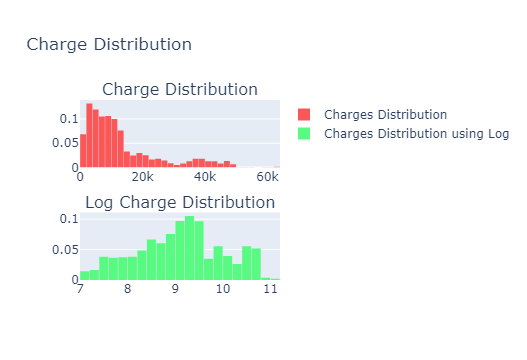

In [9]:
# Determine the distribution of charge
charge_dist = df["charges"].values
logcharge = np.log(df["charges"])



trace0 = go.Histogram(
    x=charge_dist,
    histnorm='probability',
    name="Charges Distribution",
    marker = dict(
        color = '#FA5858',
    )
)
trace1 = go.Histogram(
    x=logcharge,
    histnorm='probability',
    name="Charges Distribution using Log",
    marker = dict(
        color = '#58FA82',
    )
)

fig = tools.make_subplots(rows=2, cols=1,
                          subplot_titles=('Charge Distribution','Log Charge Distribution'),
                         print_grid=False)



fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)


fig['layout'].update(showlegend=True, title='Charge Distribution', bargap=0.05)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

### Age Analysis:
<a id="age_cat"></a>
<h4>Turning Age into Categorical Variables: </h4>
<ul> 
    <li><b>Young Adult: </b> from 18 - 35 </li>
    <li><b>Senior Adult: </b> from 36 - 55 </li>
    <li><b>Elder: </b> 56 or older </li>
    <li><b> Share of each Category: </b> Young Adults (42.9%), Senior Adults (41%) and Elder (16.1%) </li>
    </ul>

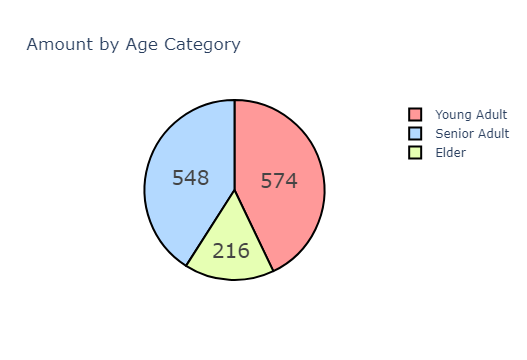

In [12]:
df['age_cat'] = np.nan
lst = [df]

for col in lst:
    col.loc[(col['age'] >= 18) & (col['age'] <= 35), 'age_cat'] = 'Young Adult'
    col.loc[(col['age'] > 35) & (col['age'] <= 55), 'age_cat'] = 'Senior Adult'
    col.loc[col['age'] > 55, 'age_cat'] = 'Elder'
    
    
labels = df["age_cat"].unique().tolist()
amount = df["age_cat"].value_counts().tolist()

colors = ["#ff9999", "#b3d9ff", " #e6ffb3"]

trace = go.Pie(labels=labels, values=amount,
               hoverinfo='label+percent', textinfo='value', 
               textfont=dict(size=20),
               marker=dict(colors=colors, 
                           line=dict(color='#000000', width=2)))

data = [trace]
layout = go.Layout(title="Amount by Age Category")

fig = go.Figure(data=data, layout=layout)
iplot(fig, filename='basic_pie_chart')

<h3> Is there a Relationship between BMI and Age</h3>
<a id="bmi_age"></a>
<ul>
    <li><b>BMI frequency: </b> Most of the BMI frequency is concentrated between 27 - 33. </li>
    <li><b> Correlations </b> Age and charges have a correlation of 0.29 while bmi and charges have a correlation of 0.19 </li>
    <li><b> Relationship betweem BMI and Age: </b> The correlation for these two variables is 0.10 which is not that great. Therefore, we can disregard that age has a huge influence on BMI. </li>
    </ul>

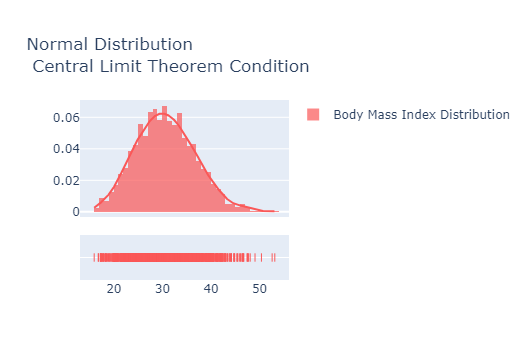

In [15]:
bmi = [df["bmi"].values.tolist()]
group_labels = ['Body Mass Index Distribution']

colors = ['#FA5858']

fig = ff.create_distplot(bmi, group_labels, colors=colors)
# Add title
fig['layout'].update(title='Normal Distribution <br> Central Limit Theorem Condition')

iplot(fig, filename='Basic Distplot')

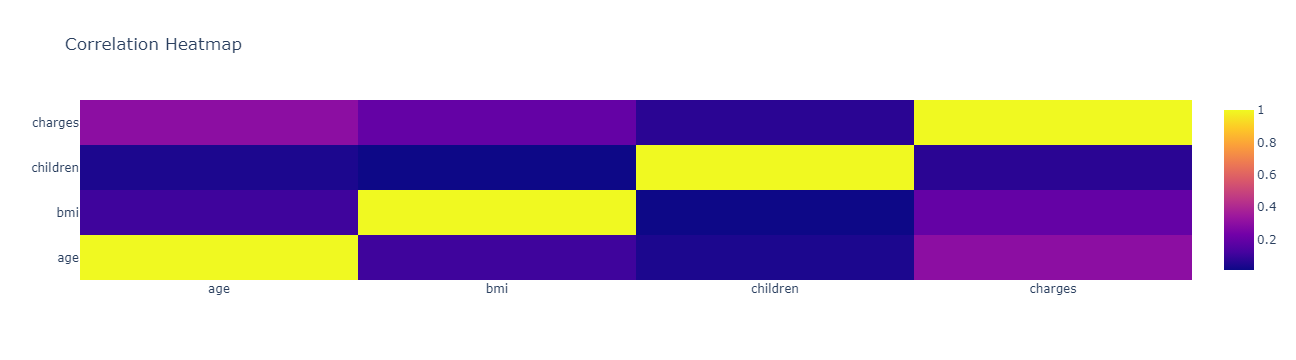

In [17]:
numerical_df = df.select_dtypes(include=['number'])
corr = numerical_df.corr()

hm = go.Heatmap(
    z=corr.values,
    x=corr.index.values.tolist(),
    y=corr.index.values.tolist()
)


data = [hm]
layout = go.Layout(title="Correlation Heatmap")

fig = dict(data=data, layout=layout)
iplot(fig, filename='labelled-heatmap')

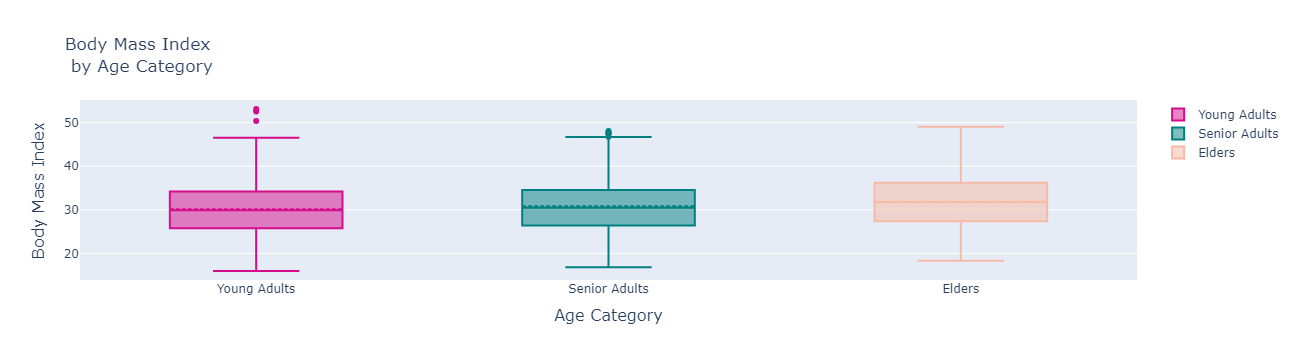

In [19]:
young_adults = df["bmi"].loc[df["age_cat"] == "Young Adult"].values
senior_adult = df["bmi"].loc[df["age_cat"] == "Senior Adult"].values
elders = df["bmi"].loc[df["age_cat"] == "Elder"].values

trace0 = go.Box(
    y=young_adults,
    name = 'Young Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(214, 12, 140)',
    )
)
trace1 = go.Box(
    y=senior_adult,
    name = 'Senior Adults',
    boxmean= True,
    marker = dict(
        color = 'rgb(0, 128, 128)',
    )
)

trace2 = go.Box(
    y=elders,
    name = 'Elders',
    boxmean= True,
    marker = dict(
        color = 'rgb(247, 186, 166)',
    )
)




data = [trace0, trace1, trace2]

layout = go.Layout(title="Body Mass Index <br> by Age Category", xaxis=dict(title="Age Category", titlefont=dict(size=16)),
                  yaxis=dict(title="Body Mass Index", titlefont=dict(size=16)))

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<h4> Comparing Independent Categorical Variables (ANOVA) </h4>
<a id="ANOVA"></a>
<ul>
    <li> <b> P-value: </b>The p-value being higher than 0.05 tells us that we take the Null hypothesis, meaning that there is no a significant change between the three age categories when it comes to Body Mass Index.</li>
    </ul>

In [23]:
import statsmodels.api as sm
from statsmodels.formula.api import ols


moore_lm = ols("bmi ~ age_cat", data=df).fit()
print(moore_lm.summary())

                            OLS Regression Results                            
Dep. Variable:                    bmi   R-squared:                       0.009
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     5.949
Date:                Mon, 18 Nov 2024   Prob (F-statistic):            0.00268
Time:                        11:04:04   Log-Likelihood:                -4311.2
No. Observations:                1338   AIC:                             8628.
Df Residuals:                    1335   BIC:                             8644.
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                              coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------------
Intercept                 

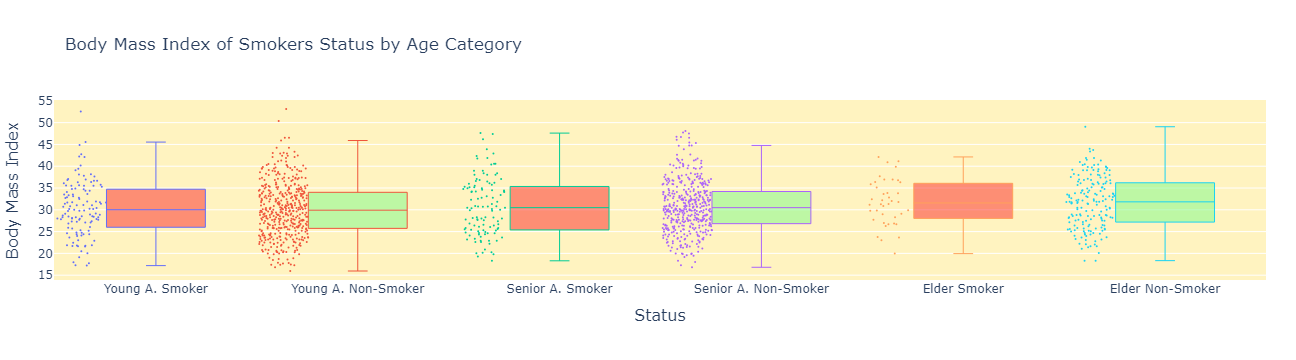

In [25]:
from plotly.offline import iplot
import plotly.graph_objs as go

ya_smoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "yes")].values
sa_smoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "yes")].values
e_smoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "yes")].values

# Non-Smokers
ya_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Young Adult") & (df["smoker"] == "no")].values
sa_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Senior Adult") & (df["smoker"] == "no")].values
e_nonsmoker = df["bmi"].loc[(df["age_cat"] == "Elder") & (df["smoker"] == "no")].values

x_data = ['Young A. Smoker', 'Young A. Non-Smoker',
          'Senior A. Smoker', 'Senior A. Non-Smoker',
          'Elder Smoker', 'Elder Non-Smoker',]

y0 = ya_smoker
y1 = ya_nonsmoker
y2 = sa_smoker
y3 = sa_nonsmoker
y4 = e_smoker
y5 = e_nonsmoker

y_data = [y0,y1,y2,y3,y4,y5]

colors = ['rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)', 
          'rgba(251, 43, 43, 0.5)', 'rgba(125, 251, 137, 0.5)']

traces = []

for xd, yd, cls in zip(x_data, y_data, colors):
        traces.append(go.Box(
            y=yd,
            name=xd,
            boxpoints='all',
            jitter=0.5,
            whiskerwidth=0.2,
            fillcolor=cls,
            marker=dict(
                size=2,
            ),
            line=dict(width=1),
        ))

layout = go.Layout(
    title='Body Mass Index of Smokers Status by Age Category',
    xaxis=dict(
    title="Status",
    titlefont=dict(
    size=16)),
    yaxis=dict(
        title="Body Mass Index",
        autorange=True,
        showgrid=True,
        zeroline=True,
        dtick=5,
        gridcolor='rgb(255, 255, 255)',
        gridwidth=1,
        zerolinecolor='rgb(255, 255, 255)',
        zerolinewidth=2,
        titlefont=dict(
        size=16)
    ),
    margin=dict(
        l=40,
        r=30,
        b=80,
        t=100,
    ),
    paper_bgcolor='rgb(255, 255, 255)',
    plot_bgcolor='rgb(255, 243, 192)',
    showlegend=False
)

fig = go.Figure(data=traces, layout=layout)
iplot(fig)

### Who got charged more on Average by Age?
<a id="charged_age"></a>
<ul> 
    <li><b>Patient Charge Mean: </b> For <b>young adults </b> it is 7,944, for <b> Senior Adults </b> it is 14,785  and for the <b>elder</b> it is 18,795. </li>
     <li><b>Patient Charge Median: </b> For <b>young adults </b> it is 4,252, for <b> Senior Adults </b> it is 9,565  and for the <b>elder</b> it is 13,429. </li>
    <li> <b> Mean and the Median:</b> Sometimes we must be careful when using the mean since it is prone to be affected by outliers.</li>
    </ul>

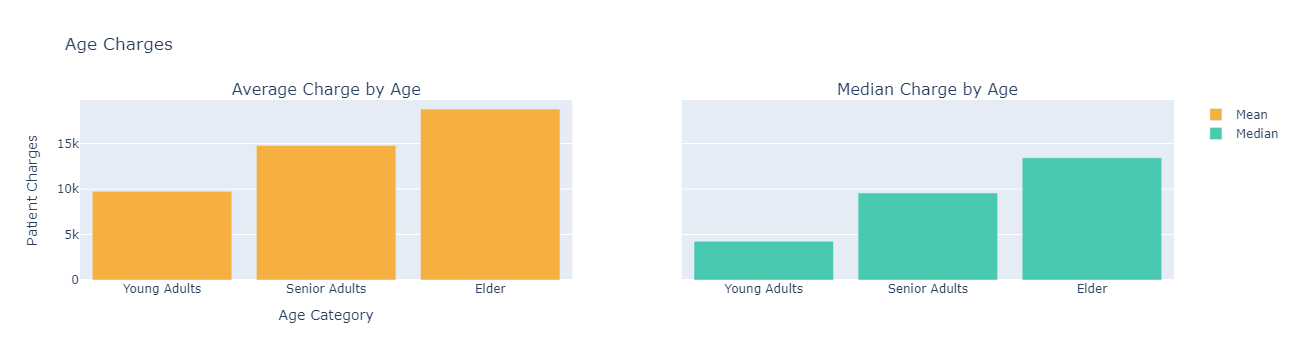

In [28]:
# Mean could be affected easily by outliers or extreme cases.
# Means
avg_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].mean()
avg_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].mean()
avg_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].mean()

# Median
med_ya_charge = df["charges"].loc[df["age_cat"] == "Young Adult"].median()
med_sa_charge = df["charges"].loc[df["age_cat"] == "Senior Adult"].median()
med_e_charge = df["charges"].loc[df["age_cat"] == "Elder"].median()

average_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[avg_ya_charge, avg_sa_charge, avg_e_charge],
    name='Mean',
    marker=dict(
        color="#F5B041"
    )
)
med_plot = go.Bar(
    x=['Young Adults', 'Senior Adults', 'Elder'],
    y=[med_ya_charge, med_sa_charge, med_e_charge],
    name='Median',
    marker=dict(
        color="#48C9B0"
    )
)


fig = tools.make_subplots(rows=1, cols=2, specs=[[{}, {}]],
                          subplot_titles=('Average Charge by Age','Median Charge by Age'),
                         shared_yaxes=True, print_grid=False)


fig.append_trace(average_plot, 1, 1)
fig.append_trace(med_plot, 1, 2)


fig['layout'].update(showlegend=True, title='Age Charges', xaxis=dict(title="Age Category"), yaxis=dict(title="Patient Charges"), bargap=0.15)
iplot(fig, filename='custom-sized-subplot-with-subplot-titles')

### Weight Status:
https://www.cancer.org/cancer/cancer-causes/diet-physical-activity/body-weight-and-cancer-risk/adult-bmi.html

<h4>Turning BMI into Categorical Variables: </h4>
<a id="bmi_cat"></a>
<ul>
    <li><b>Under Weight: </b> Body Mass Index (BMI) $<$ 18.5  </li>
    <li><b>Normal Weight: </b>  Body Mass Index (BMI) $\geq$ 18.5 and  Body Mass Index (BMI) $<$ 24.9 </li>
    <li><b>Overweight: </b>  Body Mass Index (BMI) $\geq$ 25 and  Body Mass Index (BMI) $<$ 29.9</li>
    <li><b>Obese: </b>  Body Mass Index (BMI) $>$ 30 </li>
    </ul>

In [31]:
df["weight_condition"] = np.nan
lst = [df]

for col in lst:
    col.loc[col["bmi"] < 18.5, "weight_condition"] = "Underweight"
    col.loc[(col["bmi"] >= 18.5) & (col["bmi"] < 24.986), "weight_condition"] = "Normal Weight"
    col.loc[(col["bmi"] >= 25) & (col["bmi"] < 29.926), "weight_condition"] = "Overweight"
    col.loc[col["bmi"] >= 30, "weight_condition"] = "Obese"
    
df.head()

age     sex     bmi  children smoker     region      charges      age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400  Young Adult   
1   18    male  33.770         1     no  southeast   1725.55230  Young Adult   
2   28    male  33.000         3     no  southeast   4449.46200  Young Adult   
3   33    male  22.705         0     no  northwest  21984.47061  Young Adult   
4   32    male  28.880         0     no  northwest   3866.85520  Young Adult   

  weight_condition  
0       Overweight  
1            Obese  
2            Obese  
3    Normal Weight  
4       Overweight

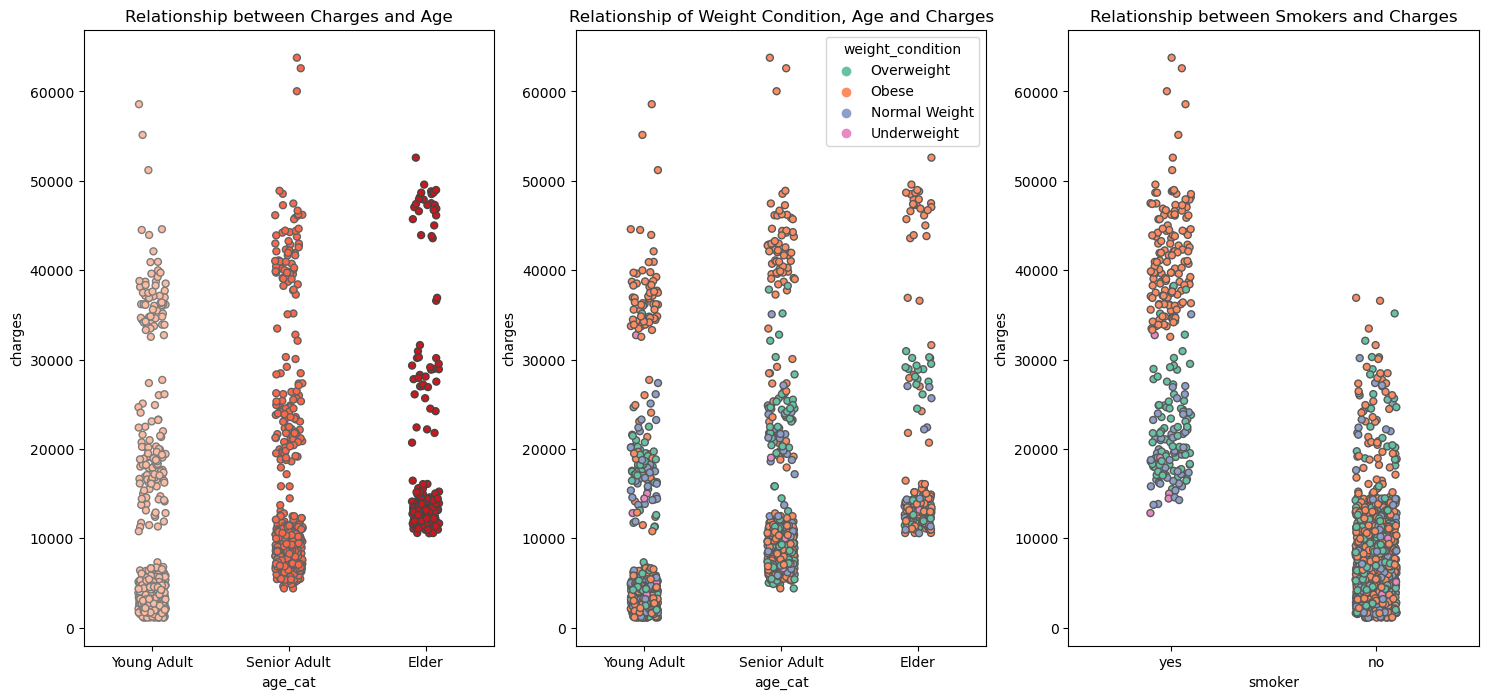

In [33]:
# Create subpplots
f, (ax1, ax2, ax3) = plt.subplots(ncols=3, figsize=(18,8))

# I wonder if the cluster that is on the top is from obese people
sns.stripplot(x="age_cat", y="charges", data=df, ax=ax1, linewidth=1, palette="Reds")
ax1.set_title("Relationship between Charges and Age")


sns.stripplot(x="age_cat", y="charges", hue="weight_condition", data=df, ax=ax2, linewidth=1, palette="Set2")
ax2.set_title("Relationship of Weight Condition, Age and Charges")

sns.stripplot(x="smoker", y="charges", hue="weight_condition", data=df, ax=ax3, linewidth=1, palette="Set2")
ax3.legend_.remove()
ax3.set_title("Relationship between Smokers and Charges")

plt.show()

In [35]:
# Make sure we don't have any null values
df[df.isnull().any(axis=1)]

Empty DataFrame
Columns: [age, sex, bmi, children, smoker, region, charges, age_cat, weight_condition]
Index: []

<h3> Weight Status vs Charges</h3>
<a id="weight_charges"></a>

<ul>
    <li> <b>Overweight: </b> Notice how there are two groups of people that get significantly charged more than the other group of overweight people. </li>
    <li><b>Obese: </b> Same thing goes with the obese group, were a significant group is charged more than the other group. </li>
    </ul>
    
**    Hmmm, might the smoking status have to do with this phenomenon?**<br> Let's find out!

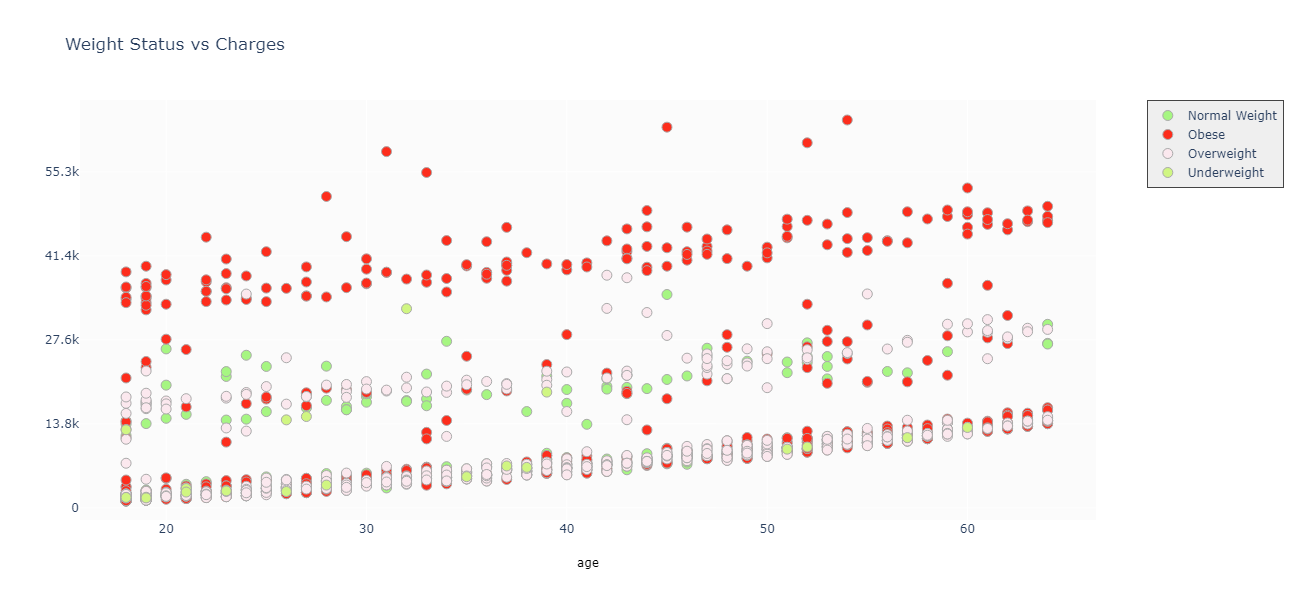

In [38]:
fig = ff.create_facet_grid(
    df,
    x='age',
    y='charges',
    color_name='weight_condition',
    show_boxes=False,
    marker={'size': 10, 'opacity': 1.0},
    colormap={'Underweight': 'rgb(208, 246, 130)', 'Normal Weight': 'rgb(166, 246, 130)',
             'Overweight': 'rgb(251, 232, 238)', 'Obese': 'rgb(253, 45, 28)'}
)
251, 232, 238


fig['layout'].update(title="Weight Status vs Charges", width=800, height=600, plot_bgcolor='rgb(251, 251, 251)', 
                     paper_bgcolor='rgb(255, 255, 255)')


iplot(fig, filename='facet - custom colormap')

In [40]:
# First find the average or median of the charges obese people paid.

obese_avg = df["charges"].loc[df["weight_condition"] == "Obese"].mean()

df["charge_status"] = np.nan
lst = [df]


for col in lst:
    col.loc[col["charges"] > obese_avg, "charge_status"] = "Above Average"
    col.loc[col["charges"] < obese_avg, "charge_status"] = "Below Average"
    
df.head()

age     sex     bmi  children smoker     region      charges      age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400  Young Adult   
1   18    male  33.770         1     no  southeast   1725.55230  Young Adult   
2   28    male  33.000         3     no  southeast   4449.46200  Young Adult   
3   33    male  22.705         0     no  northwest  21984.47061  Young Adult   
4   32    male  28.880         0     no  northwest   3866.85520  Young Adult   

  weight_condition  charge_status  
0       Overweight  Above Average  
1            Obese  Below Average  
2            Obese  Below Average  
3    Normal Weight  Above Average  
4       Overweight  Below Average

In [42]:
# No Nulls
df["charge_status"].isnull().sum()

0

<h3> Obesity and the Impact of Smoking to the Wallet: </h3>
<a id="obese_smoker"> </a>
<ul> 
    <li> Notice in the <b> charges </b> box how smoking looks to have a certain impact on medical costs.</li>
    <li> Let's find out how much of a difference there is between the group of <b> obese </b> patients that smoke compared to the group of <b> obese </b> patients that don't smoke.</li>
    </ul>

Text(0.5, 1.0, 'Smokers')

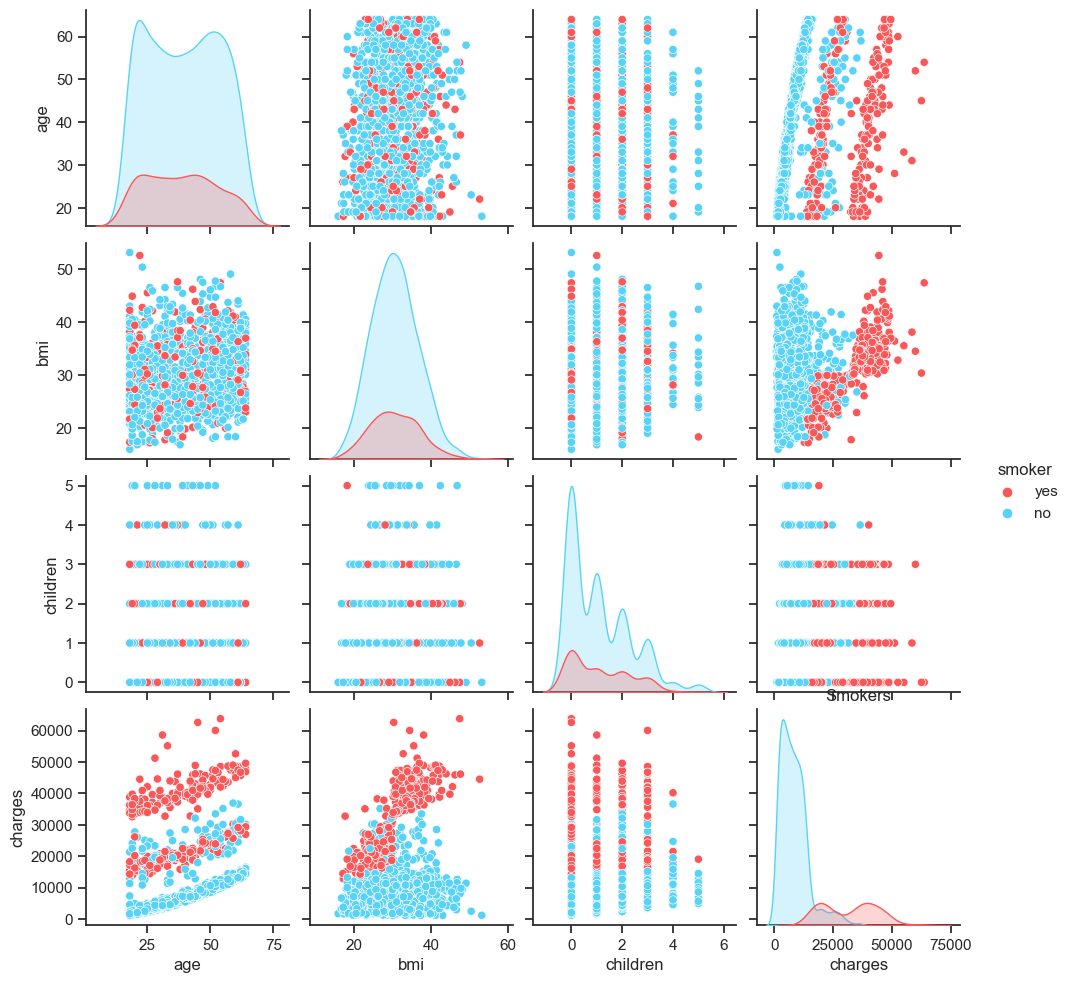

In [45]:
import seaborn as sns
sns.set(style="ticks")
pal = ["#FA5858", "#58D3F7"]

sns.pairplot(df, hue="smoker", palette=pal)
plt.title("Smokers")

In [47]:
# What Percentage of Obese that Smoked Paid aBove Average from the total obese patients?
# 79% of Obese were non-smokers while the 21% left were smokers
total_obese = len(df.loc[df["weight_condition"] == "Obese"])

obese_smoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")])/total_obese
obese_smoker_prop = round(obese_smoker_prop, 2)

obese_nonsmoker_prop = len(df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")])/total_obese
obese_nonsmoker_prop = round(obese_nonsmoker_prop, 2)


# Average charge by obese_smokers and obese_nonsmoker
charge_obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes"), "charges"].mean()
charge_obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no"), "charges"].mean()

<h4>Distribution of Charges (Obese Smoker vs Obese non-Smoker) </h4>
<a id="obesevsnonobese_smokers"></a>
<ul> 
    <li><b>Violin Plots: </b> We will be using violin plots to <b>compare the distributions of patients of the obese group who are smokers and non-smokers. </b> </li>
    <li><b> Obese smokers distribution: </b> Most obese smokers pay around 40k in medical costs! </li>
    <li> <b>Obese non-smokers distribution: </b> Most obese non-smokers pay 8k in medical costs. </li>
    <li> <b> Smoking a factor to the wallet </b> Smoking is defninitely a big factor for obese patients when it comes to medical cost. A difference of more than 30k!</li>
    </ul>

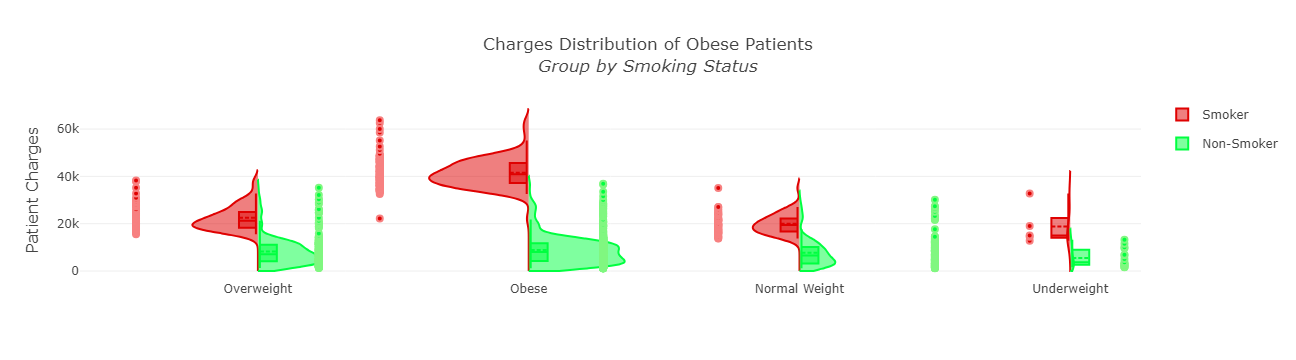

In [50]:

pointspossmoker = [-0.9,-1.1,-0.6,-0.3]
pointposnonsmoker = [0.45,0.55,1,0.4]
showLegend = [True,False,False,False]

data = []
for i in range(0,len(pd.unique(df['weight_condition']))):
    male = {
            "type": 'violin',
            "x": df['weight_condition'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'][ (df['smoker'] == 'yes') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Smoker',
            "scalegroup": 'Smoker',
            "name": 'Smoker',
            "side": 'negative',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointspossmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#DF0101'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#F78181'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(male)
    female = {
            "type": 'violin',
            "x": df['weight_condition'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "y": df['charges'] [ (df['smoker'] == 'no') & (df['weight_condition'] == pd.unique(df['weight_condition'])[i]) ],
            "legendgroup": 'Non-Smoker',
            "scalegroup": 'Non-Smoker',
            "name": 'Non-Smoker',
            "side": 'positive',
            "box": {
                "visible": True
            },
            "points": 'all',
            "pointpos": pointposnonsmoker[i],
            "jitter": 0,
            "scalemode": 'count',
            "meanline": {
                "visible": True
            },
            "line": {
                "color": '#00FF40'
            },
            "marker": {
                "line": {
                    "width": 2,
                    "color": '#81F781'
                }
            },
            "span": [
                0
            ],
            "showlegend": showLegend[i]
        }
    data.append(female)
        

fig = {
    "data": data,
    "layout" : {
        "title": "Charges Distribution of Obese Patients<br><i>Group by Smoking Status",
        "yaxis": {
            "zeroline": False,
            "title": "Patient Charges",
            "titlefont": {
                "size": 16
            }
        },
        "violingap": 0,
        "violingroupgap": 0,
        "violinmode": "overlay"
    }
}


iplot(fig, filename='violin/advanced', validate = False)

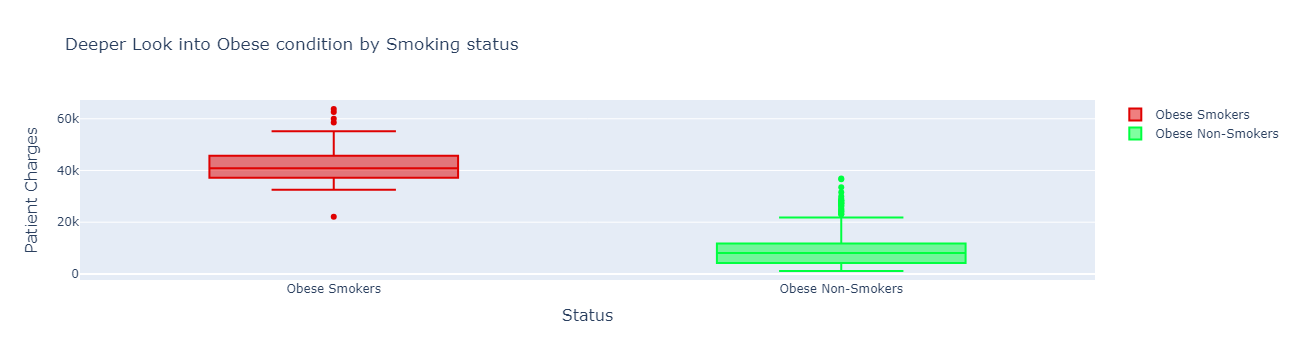

In [52]:
# Hmmm we have to look closer into Obsese there is an obvious difference

chargedist_sm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")].values
chargedist_nsm = df["charges"].loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")].values

trace0 = go.Box(
    y=chargedist_sm,
    name = 'Obese Smokers',
    marker = dict(
        color = '#DF0101',
    )
)
trace1 = go.Box(
    y=chargedist_nsm,
    name = 'Obese Non-Smokers',
    marker = dict(
        color = '#00FF40',
    )
)


data = [trace0, trace1]


layout = dict(title="Deeper Look into Obese condition by Smoking status",
             xaxis=dict(
             title="Status",
             titlefont=dict(
             size=16)),
             yaxis=dict(title="Patient Charges",
                       titlefont=dict(size=16)),
              )

fig = go.Figure(data=data, layout=layout)
iplot(fig)

<h4>Separation in Charges between Obese Smokers vs Non-Obese Smokers </h4>
<a id="separation"></a>
In this chart we can visualize how can <b> separate</b> obese smokers and obese non-smokers into different <b> clusters </b> of groups. Therefore, we can say that smoking is a <b>characteristic</b> that definitely affects patient's charges.

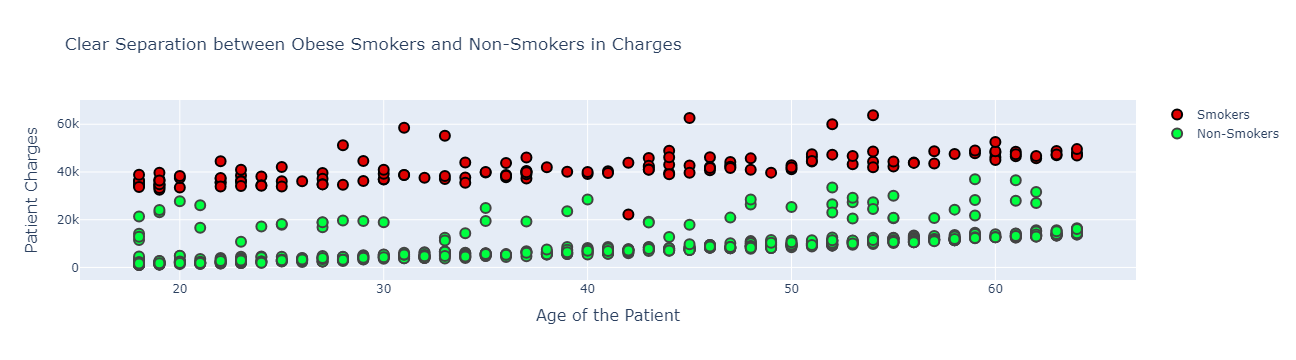

In [55]:
# Create a Scatter Plot with all the Obese
obese_smoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "yes")]
obese_nonsmoker = df.loc[(df["weight_condition"] == "Obese") & (df["smoker"] == "no")]


trace0 = go.Scatter(
    x = obese_smoker["age"].values,
    y = obese_smoker["charges"].values,
    name = 'Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#DF0101',
        line = dict(
            width = 2,
            color = 'rgb(0, 0, 0)'
        )
    )
)

trace1 = go.Scatter(
    x = obese_nonsmoker["age"].values,
    y = obese_nonsmoker["charges"].values,
    name = 'Non-Smokers',
    mode = 'markers',
    marker = dict(
        size = 10,
        color = '#00FF40',
        line = dict(
            width = 2,
        )
    )
)

data = [trace0, trace1]

layout = dict(title = 'Clear Separation between Obese Smokers and Non-Smokers in Charges',
              yaxis = dict(zeroline = False,
                          title="Patient Charges",
                          titlefont=dict(size=16)),
              xaxis = dict(zeroline = False,
                          title="Age of the Patient",
                          titlefont=dict(
                          size=16))
             )

fig = dict(data=data, layout=layout)
iplot(fig, filename='styled-scatter')

<h2 align="center"><b>Regional Analysis: </b></h2>
<h3> Building a Contingency Table: </h3>
<a id="building_contingency">

In [58]:
# Cont table by weight condition and sex
df.head()

region_smoker = pd.crosstab(df['smoker'], df['region']).apply(lambda x: x/x.sum() * 100)
region_smoker

region  northeast  northwest  southeast  southwest
smoker                                            
no      79.320988  82.153846       75.0  82.153846
yes     20.679012  17.846154       25.0  17.846154

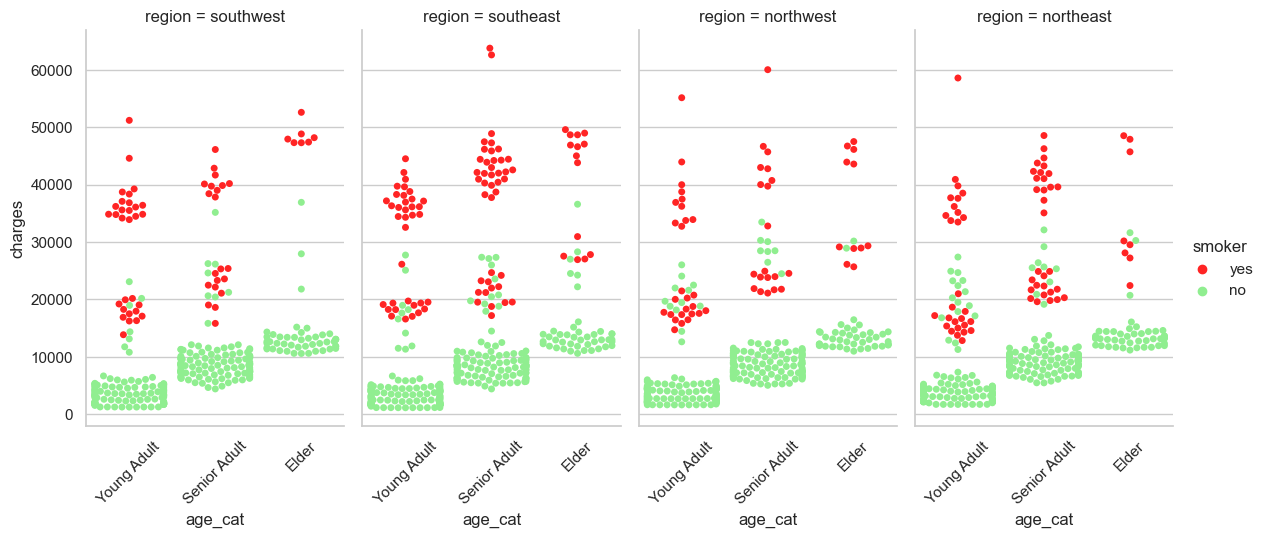

In [60]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_theme(style="whitegrid")


ticks = df['age_cat'].unique()
colors = ['#ff2424', '#90ee90']


ax = sns.catplot(x="age_cat", y="charges", hue="smoker",
                 col="region", aspect=.6,
                 kind="swarm", palette=colors, data=df);
ax.set_xticklabels(rotation=45)

plt.show()

In [62]:
# Obesity per region
region_weight = pd.crosstab(df['weight_condition'], df['region']).apply(lambda x: x/x.sum() * 100)
region_weight = round(region_weight, 2)
region_weight

region            northeast  northwest  southeast  southwest
weight_condition                                            
Normal Weight         22.53      19.38      11.26      14.77
Obese                 44.14      45.54      66.76      53.23
Overweight            30.25      32.92      21.98      31.08
Underweight            3.09       2.15       0.00       0.92

<h3>Average Patient Charge by Region: </h3>
<a id="average_region"></a>
<ul>
    <li><b> Median Patient Charges: </b> The <b>NorthEast</b> is the region that pays the most on average while the <b>SouthWest</b> is the one that pays </li>
    <li><b>Obese group: </b> From the obese group, the Southwest is the region where obese patients pay the most..</li>
    <li><b>Overweight: </b> From the obese group, the NorthWest is the region where obese patients pay the most.  </li>
    <li><b>Normal Weight: </b> From the obese group, the SouthEast is the region where obese patients pay the most.  </li>
    <li><b>Underweight: </b> From the obese group, the NorthWest is the region where obese patients pay the most.</li>
    </ul>

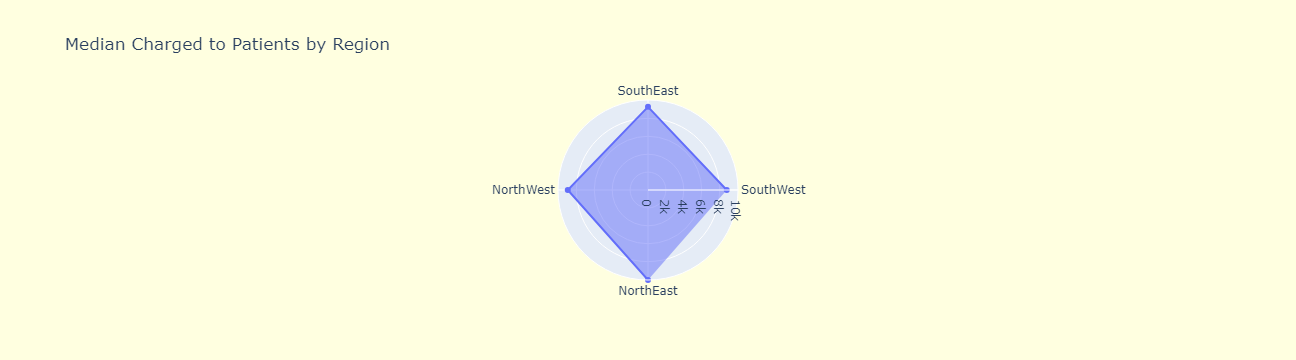

In [65]:
df.head()


# Average charge by Region
df["region"].unique()

# Median Charges per Region
southwest = np.median(df["charges"].loc[df["region"] == "southwest"].values)
southeast = np.median(df["charges"].loc[df["region"] == "southeast"].values)
northwest = np.median(df["charges"].loc[df["region"] == "northwest"].values)
northeast = np.median(df["charges"].loc[df["region"] == "northeast"].values)

lst = [southwest, southeast, northwest, northeast]

data = [go.Scatterpolar(
  r = [southwest, southeast, northwest, northeast],
  theta = ['SouthWest', 'SouthEast', 'NorthWest', 'NorthEast'],
  fill = 'toself'
)]

layout = go.Layout(
    title="Median Charged to Patients by Region",
    paper_bgcolor = "rgb(255, 255, 224)",
  polar = dict(
    radialaxis = dict(
      visible = True,
      range = [0, max(lst)]
    )
  ),
  showlegend = False
)


fig = go.Figure(data=data, layout=layout)
iplot(fig, filename = "radar/basic")

<h4>Average Charge by Region depending on the Weight Condition: </h4>
<a id="charge_condition"></a>


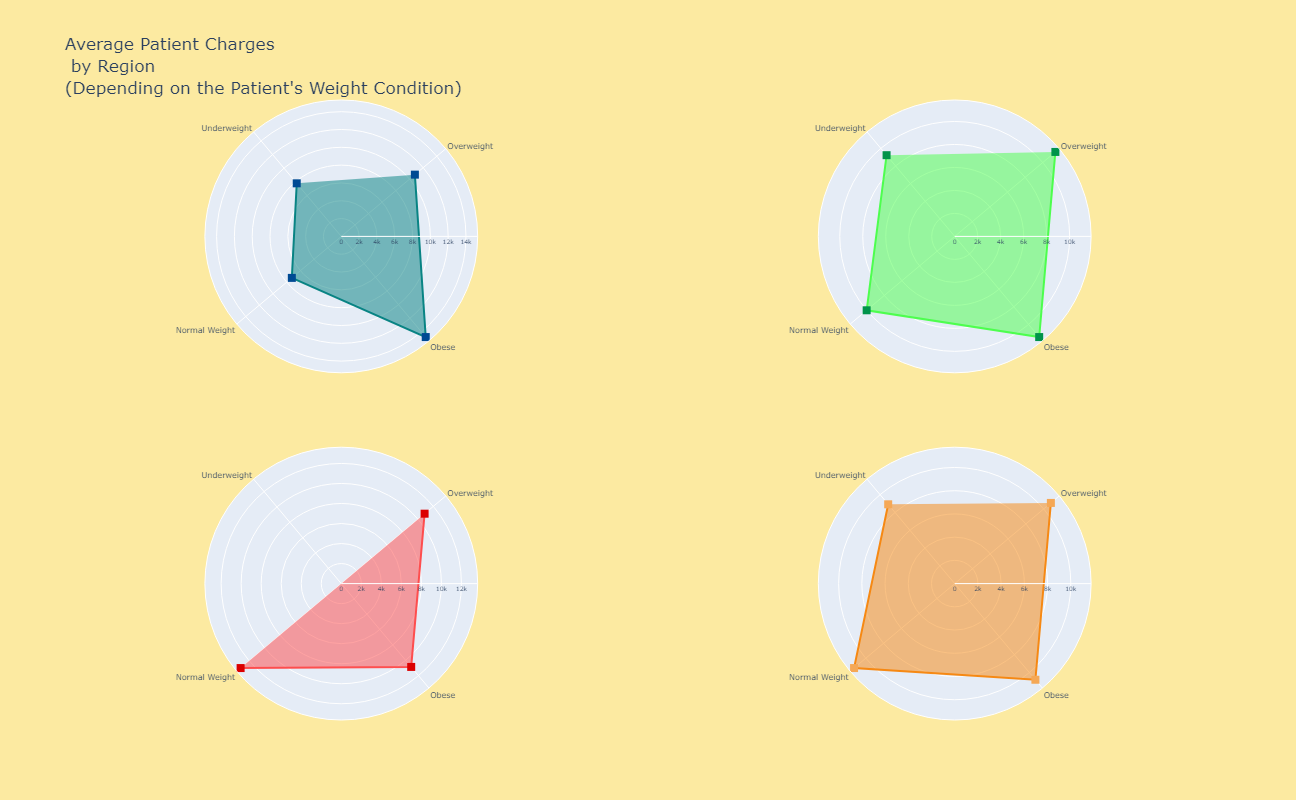

In [68]:
# Weight Condition by Region Radar plots

df["weight_condition"].unique()

# Average charges for overweight patients by region 
sw_overweight = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Overweight")].values)
se_overweight = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Overweight")].values)
nw_overweight = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Overweight")].values)
ne_overweight = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Overweight")].values)

# Obese
sw_obese = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Obese")].values)
se_obese = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Obese")].values)
nw_obese = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Obese")].values)
ne_obese = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Obese")].values)

# Normal Weight
sw_nw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Normal Weight")].values)
se_nw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Normal Weight")].values)
nw_nw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Normal Weight")].values)
ne_nw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Normal Weight")].values)

# Underweight
sw_uw = np.mean(df["charges"].loc[(df["region"] == "southwest") & (df["weight_condition"] == "Underweight")].values)
se_uw = np.mean(df["charges"].loc[(df["region"] == "southeast") & (df["weight_condition"] == "Underweight")].values)
nw_uw = np.mean(df["charges"].loc[(df["region"] == "northwest") & (df["weight_condition"] == "Underweight")].values)
ne_uw = np.mean(df["charges"].loc[(df["region"] == "northeast") & (df["weight_condition"] == "Underweight")].values)

# Labels
weight_labels = df["weight_condition"].unique().tolist()

# List per weight condition
sw_weights = [sw_overweight, sw_obese, sw_nw, sw_uw]
se_weights = [se_overweight, se_overweight, se_nw, se_uw]
nw_weights = [nw_overweight, nw_overweight, nw_nw, nw_uw]
ne_weights = [ne_overweight, ne_overweight, ne_nw, ne_uw]

data = [
    go.Scatterpolar(
        mode="lines+markers",
        r = sw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthWest",
        line=dict(
            color="rgba(0, 128, 128, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 74, 147, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = se_weights,
        theta = weight_labels,
        fill = 'toself',
        name="SouthEast",
        line=dict(
            color="rgba(255, 72, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(219, 0, 0, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar2"
    ),
    go.Scatterpolar(
        mode="lines+markers",
        r = nw_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthWest",
        line=dict(
            color="rgba(72, 255, 72, 0.95)"
        ),
        marker=dict(
            color="rgba(0, 147, 74, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar3"
    ),
       go.Scatterpolar(
        mode="lines+markers",
        r = ne_weights,
        theta = weight_labels,
        fill = 'toself',
        name="NorthEast",
        line=dict(
            color="rgba(247, 133, 11, 0.95)"
        ),
        marker=dict(
            color="rgba(245, 168, 86, 1)",
            symbol="square",
            size=8
        ),
        subplot = "polar4"
    )
]

layout = go.Layout(
    title="Average Patient Charges <br> by Region <br>(Depending on the Patient's Weight Condition)",
    showlegend = False,
     paper_bgcolor = "rgb(252, 234, 161)",
    polar = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      )
    ),
    polar2 = dict(
      domain = dict(
        x = [0, 0.46],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
    polar3 = dict(
      domain = dict(
       x = [0.54, 1],
        y = [0.56, 1]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ),
        polar4 = dict(
      domain = dict(
        x = [0.54, 1],
        y = [0, 0.44]
      ),
      radialaxis = dict(
        tickfont = dict(
          size = 6
        )
      ),
      angularaxis = dict(
        tickfont = dict(
          size = 8
        ),
        rotation = 40,
        direction = "clockwise"
      ),
    ))

fig = go.Figure(data=data, layout=layout)
fig['layout'].update(height=800, width=800)
iplot(fig, filename='polar/directions')

<h2 align="center">Unsupervised Learning: </h2>
<h3>Performing Clustering in a Manual Way: </h3>
<a id="manual_cluster"></a>
In the first plot we will do a cluster analysis in a manual form and see what our eyes can discover. Here are the following results from the manual cluster analysis performed.
<ul>
    <li><b> Age and Charges: </b> We can see there is a slight increase in charges depending on the age of the patient. </li>
    <li><b> Obese Clusters: </b> We can see that for each age group there are clusters of the obese group in the top part of charges. </li>
    <li><b>Are these clusters Smokers? </b> As seen in the right chart, most of this clusters are definitely smokers.  </li>
    
</ul>

This is somewhat the same as we have explored in the previous section, but I wanted to add the factor of <b> age </b> to see until what extent this variable patient's charges. Nevertheless, we can still confirm that being obese and a smoker is the <b>grand major </b> factor at least for the group of obese and overweight patients. <br><br>

<b> Thanks to  Bhumika Bhatt for adding the factor of age with the combination of weight condition and smoking status </b>

Text(17, 40000, 'The Impact of Smoking to \n Charges on other \n Weight Conditions ')

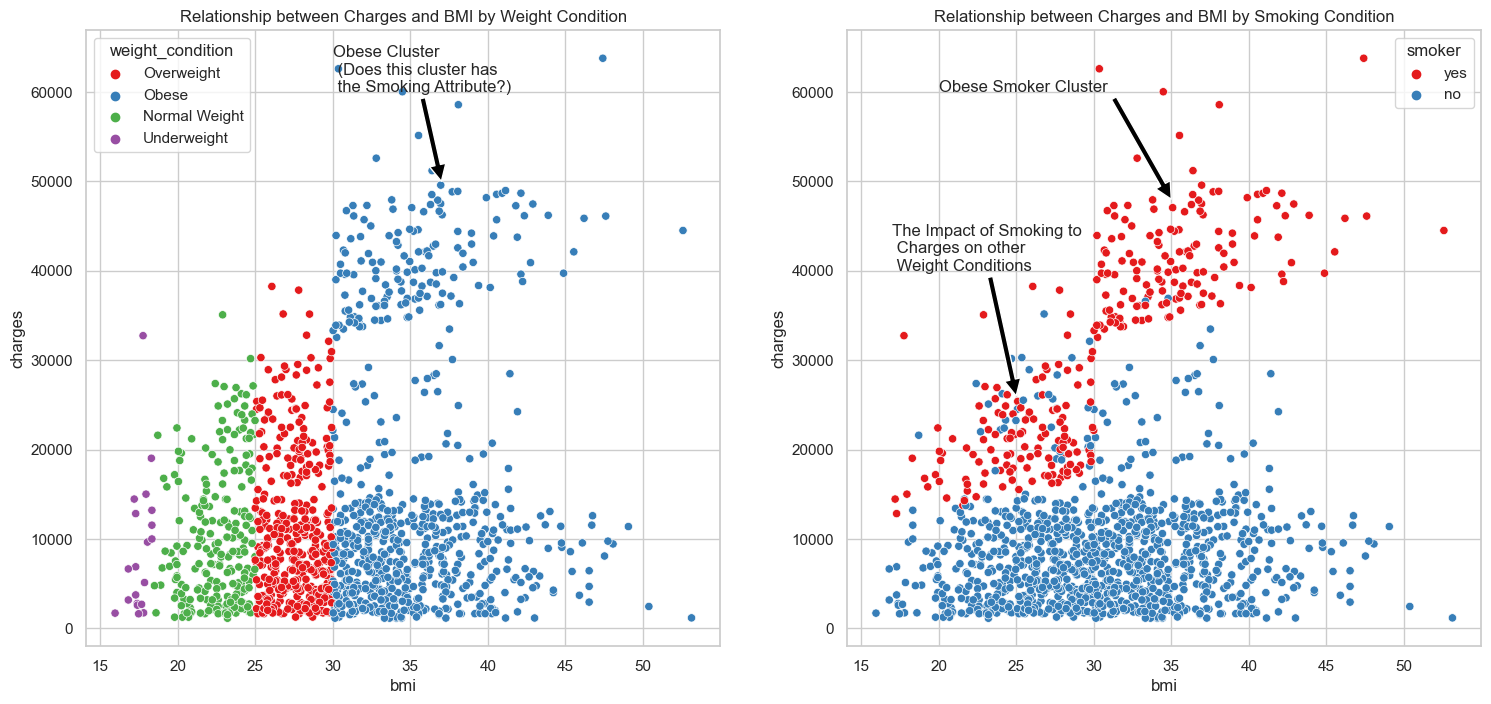

In [71]:
# Two subplots one with weight condition and the other with smoker.

f, (ax1, ax2) = plt.subplots(ncols=2, figsize=(18,8))
sns.scatterplot(x="bmi", y="charges", hue="weight_condition", data=df, palette="Set1", ax=ax1)
ax1.set_title("Relationship between Charges and BMI by Weight Condition")
ax1.annotate('Obese Cluster \n (Does this cluster has \n the Smoking Attribute?)', xy=(37, 50000), xytext=(30, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
sns.scatterplot(x="bmi", y="charges", hue="smoker", data=df, palette="Set1", ax=ax2)
ax2.set_title("Relationship between Charges and BMI by Smoking Condition")
ax2.annotate('Obese Smoker Cluster ', xy=(35, 48000), xytext=(20, 60000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)
ax2.annotate('The Impact of Smoking to \n Charges on other \n Weight Conditions ', xy=(25, 26000), xytext=(17, 40000),
            arrowprops=dict(facecolor='black'),
            fontsize=12)

<h2 align="center"> <b>Understanding KMeans Clustering: </b> </h2>
<a id="Kmeans"></a>
<img src="https://media.giphy.com/media/12vVAGkaqHUqCQ/giphy.gif"><br><br>


<h3> Before We Start Explaining the Elbow Method and KMeans Neighbors.  </h3>
The elbow method is mostly used in unsupervised learning algorithms to determine the <b> optimal number of clusters </b> that should be used to find specific unknown groups within our population. We used the <b>yellowbrick </b> library to implement a simple elbow method and to determine the appropiate number of clusters in our KMeans algorithm. <br><br>

<h3>Terms to Know: </h3>
<ul>
    <li><b> Cluster Centroids: </b> The cluster centroid is the most representative point of a specific cluster. So, if we decide to find three clusters, we will have three cluster centroid. </li>
    <li><b>Euclidean Distance: </b> Is the distance between two data points and this term is essential when gathering the distance between the cluster centroids and the data points.  </li>
    <li><b> Elbow Method: </b> The elbow method is a technique used to choose the most optimal number of clusters. Remember, in Kmeans clustering we add the number of clusters in a manual way, so the elbow method is useful when using Kmeans. Why is it called the Elbow method? Because as more iterations run to find the optimal number of clusters, the line will take the shape of the arm and the optimal number of clusters is the point that is in the elbow part of the arm. </li>
</ul>

<h3> Euclidean Distance Formula: </h3>
$\LARGE d(x,y) = \sqrt{(x_1 - x_2)^2 + (y_1 - y_2)^2}$<br>

where: <br>
$x_1$ = X-axis value of  data observation <br>
$x_2$ = X-axis value of the cluster centroid <br>
$y_1$ = Y-axis value of the data observation. <br>
$y_2$ = Y-axis value of the cluster centroid. <br>

<h3> Explaining the Elbow Method: </h3>
The elbow method finds the average sum of squares distance between the cluster centroid and the data observations. As the number of cluster increases the average sum of squares decreases. Basically, as the number of clusters increases, the distance between the data points and the centroids decreases as well. Whenever, we see the "elbow" that is a rule of thumb to consider the optimal number of clusters.


<h3 align="center">How the Elbow Method Looks Like: </h3>
<img src="https://media.licdn.com/dms/image/C4E12AQHnQ7zAvCnvZg/article-inline_image-shrink_1500_2232/0?e=1553126400&v=beta&t=_QjaAH2ydyzjy3qVwAvV9Zi1WictiLOEam9L6YuSdI4" width=600>



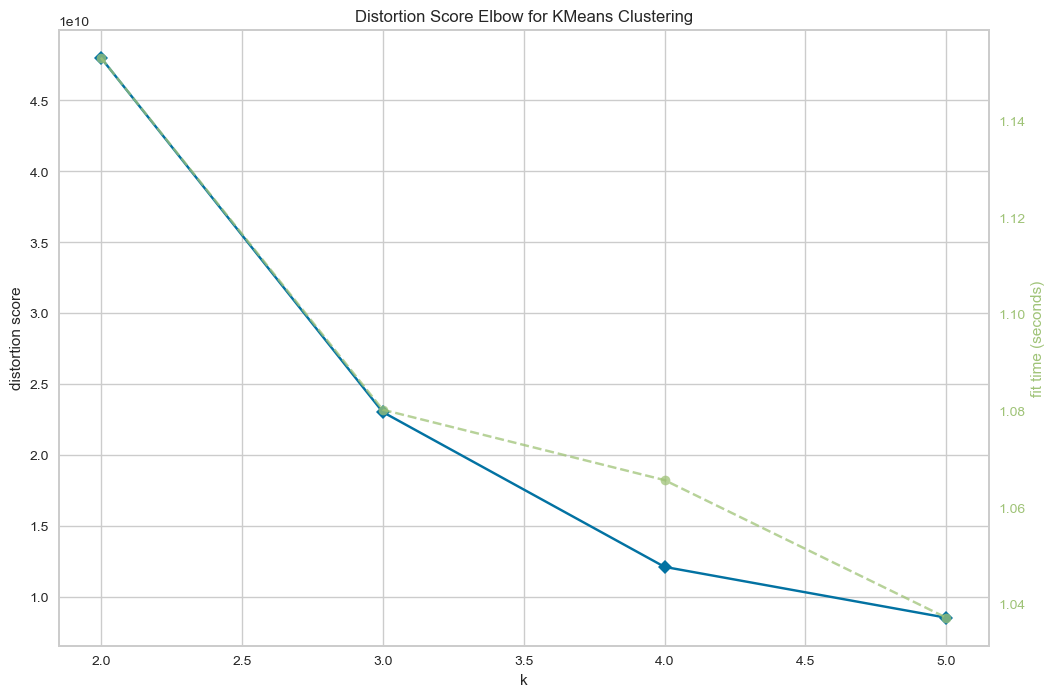

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [74]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(12,8))

# KNears Neighbors 
df.head()
original_df.head()

X = df[["bmi", "charges"]]


# Instantiate the clustering model and visualizer
model = KMeans()
visualizer = KElbowVisualizer(model, k=(2,6))

visualizer.fit(X)    # Fit the data to the visualizer
visualizer.poof()  

In [75]:
import pandas as pd
from sklearn.datasets import load_iris
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

kmeans = KMeans(n_clusters=3)  
kmeans.fit(X)

KMeans(n_clusters=3)

In [78]:
# Printing the Centroids
print(kmeans.cluster_centers_)

[[2.91786483e+01 1.76120197e+04]
 [3.47045482e+01 4.04850240e+04]
 [3.04700664e+01 6.01059930e+03]]


In [80]:
print(kmeans.labels_)

[0 2 2 ... 2 2 1]


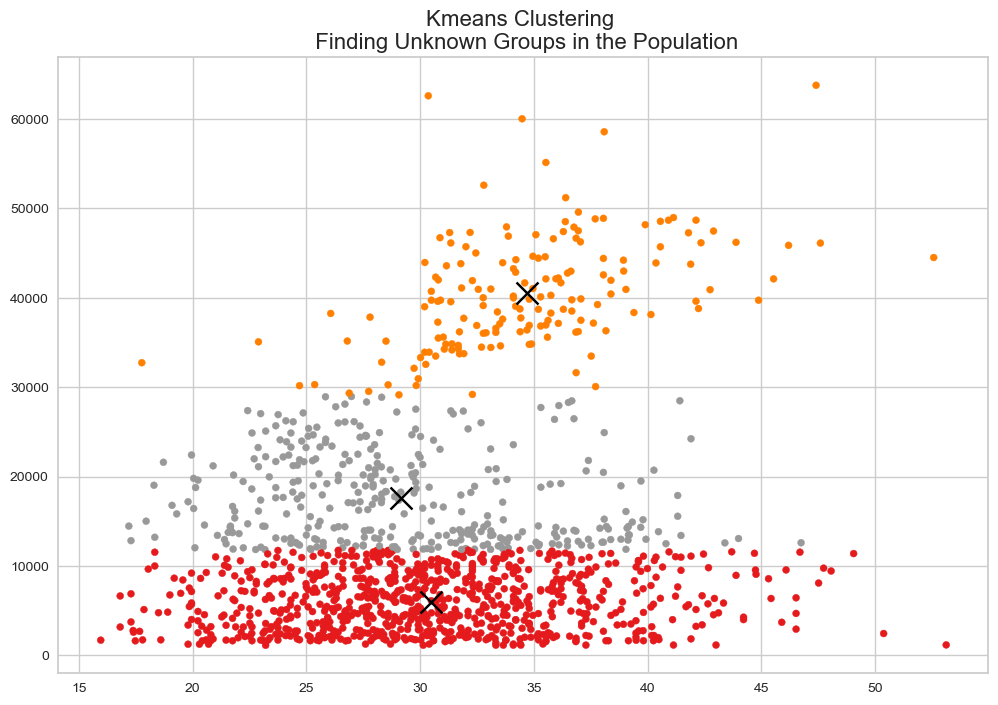

In [82]:
fig = plt.figure(figsize=(12,8))

plt.scatter(X.values[:,0], X.values[:,1], c=kmeans.labels_, cmap="Set1_r", s=25)
plt.scatter(kmeans.cluster_centers_[:,0] ,kmeans.cluster_centers_[:,1], color='black', marker="x", s=250)
plt.title("Kmeans Clustering \n Finding Unknown Groups in the Population", fontsize=16)
plt.show()

<h2> Adding more Clusters with Hierarchical Clustering:</h2>
<img src="https://www.saedsayad.com/images/Clustering_h1.png" width=800><br><br>

We use a dendogram as show above to show how two clusters are merged into one big cluster.

<h3> Two types of Approaches: </b>
<ul>
    <li><b> Agglomerative (bottom-up):</b> Each observation starts as <b>one cluster.</b> Based on the distance of those clusters (in this case observations) it will <b> merge </b> into one cluster. For instance, let's say observation A (Cluster A) and observation B (Cluster B) are two different clusters that are within a close distance. So in essence, it combines the two nearest clusters into one bigger cluster. Remember, as with K-Means clustering each cluster is represented by the <b>centroid </b> which is the average position of the data points (observations). Then each centroid will merge either with other centroids from other clusters or with individual observations which are considered to be individual clusters.</li>
    <li><b>Divisive (Top-Bottom): </b>  With this approach we start at the top with <b>one big cluster.</b> The cluster will be partitioned at a point where it splits the big cluster into two big ones and it will run K-means into each of the clusters splitting the data further down. This will get to a point where the observations cannot be split any more since each observation becomes its own cluster. If you want to understand more about K-means look at the previos example at the top of hierarchical clustering. In practice, the divisive method is not used as often as the Agglomerative method. </li>
    
</ul>
    
<h3> <b>What does the dendogram represent?</b> </h3>
To make things simple starting from the bottom, each leaf means that two observations or clusters have been merged into one bigger cluster like we explained in the Agglomerative approach. In other words it shows the "hierarchical" relationship between the clusters.


In [85]:
from sklearn.cluster import AgglomerativeClustering

X = df[["bmi", "charges"]]

agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(X)
agglomerative_clustering

AgglomerativeClustering(n_clusters=4)

In [89]:
from scipy.cluster.hierarchy import dendrogram, linkage

# 5% of the data 
sample_df = df.sample(frac=.05)

sample_X = sample_df[["bmi", "charges"]]

sample_agglomerative_clustering = AgglomerativeClustering(n_clusters=4).fit(sample_X)
sample_agglomerative_clustering


linked = linkage(sample_agglomerative_clustering.children_, 'single')

In [91]:
agglomerative_clustering.labels_

array([2, 3, 3, ..., 3, 3, 2], dtype=int64)

In [93]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


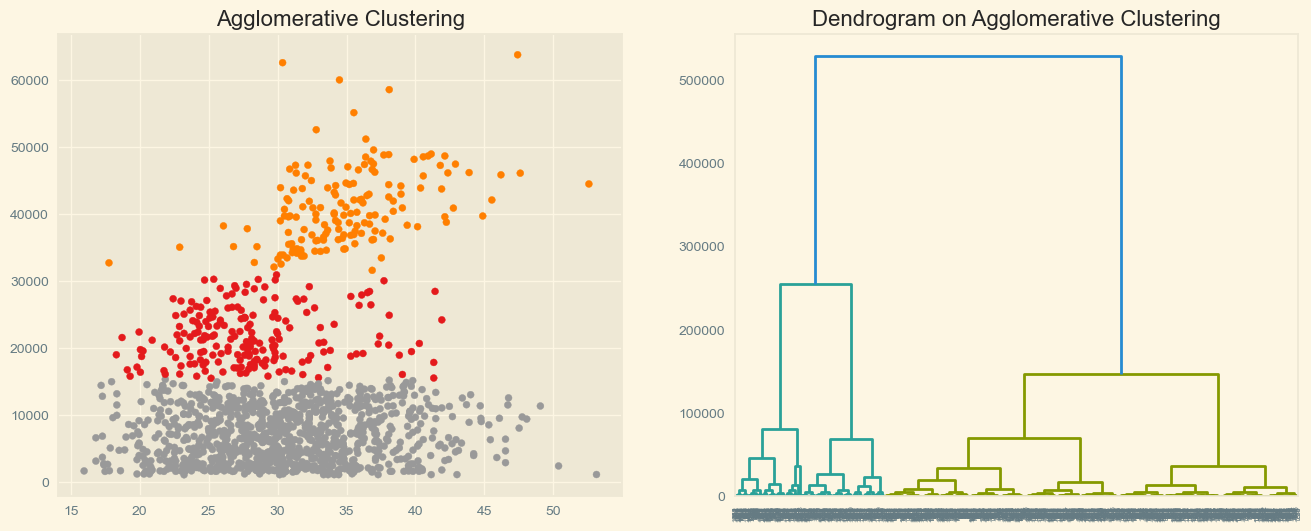

In [98]:
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import AgglomerativeClustering

agglomerative_clustering = AgglomerativeClustering(n_clusters=3)
agglomerative_clustering.fit(X)

linked = linkage(X, method='ward')

plt.style.use("Solarize_Light2")
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(16, 6))

ax1.scatter(
    X.values[:, 0],
    X.values[:, 1],
    c=agglomerative_clustering.labels_,
    cmap="Set1_r",
    s=25
)
ax1.set_title("Agglomerative Clustering", fontsize=16)

dendrogram(
    linked,
    orientation='top',
    labels=None,  # Nếu muốn chỉ định nhãn, hãy đồng bộ với `linked`
    distance_sort='descending',
    show_leaf_counts=False,
    ax=ax2
)
ax2.set_title("Dendrogram on Agglomerative Clustering")

plt.show()


<h3> 

<h3> Stress Levels (Will elaborate further on this new feature) </h3>


In [100]:
# BMI + Children / Age
df["stress_level"] = df["children"] * df["age"] / df["bmi"]

df.head()

age     sex     bmi  children smoker     region      charges      age_cat  \
0   19  female  27.900         0    yes  southwest  16884.92400  Young Adult   
1   18    male  33.770         1     no  southeast   1725.55230  Young Adult   
2   28    male  33.000         3     no  southeast   4449.46200  Young Adult   
3   33    male  22.705         0     no  northwest  21984.47061  Young Adult   
4   32    male  28.880         0     no  northwest   3866.85520  Young Adult   

  weight_condition  charge_status  stress_level  
0       Overweight  Above Average      0.000000  
1            Obese  Below Average      0.533017  
2            Obese  Below Average      2.545455  
3    Normal Weight  Above Average      0.000000  
4       Overweight  Below Average      0.000000

<h3> Correlations and Bivariate Analysis: </h3>
<a id="correlations"></a>

In [103]:
numeric_df = df.select_dtypes(include=['number'])
corr = numeric_df.corr()

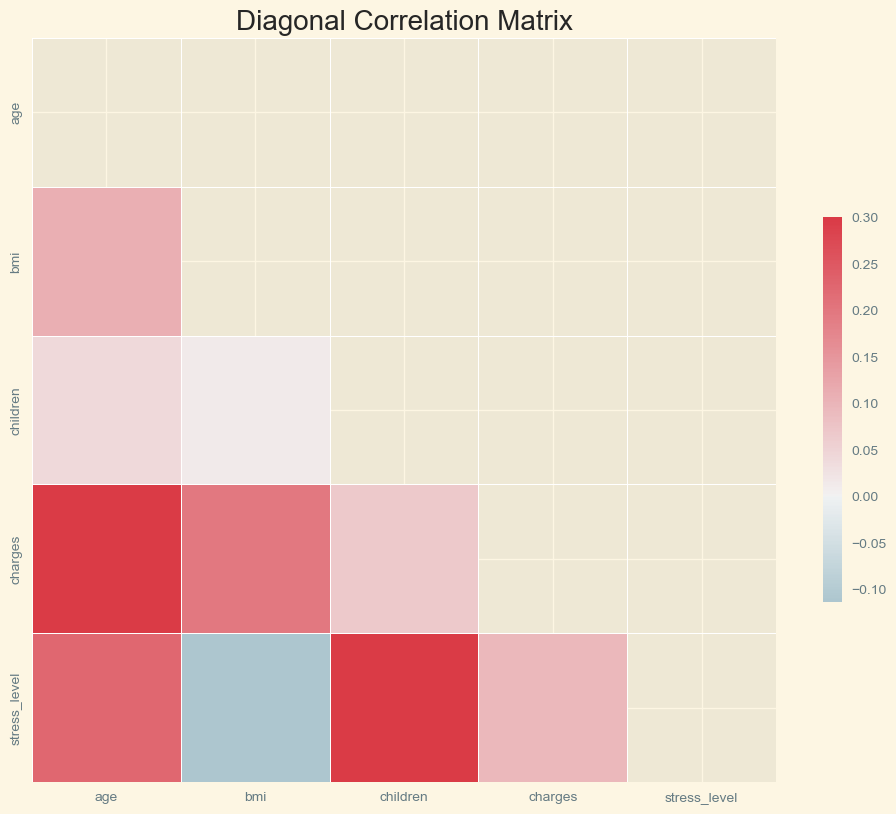

In [110]:


mask = np.zeros_like(corr, dtype=bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(12, 10))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

plt.title("Diagonal Correlation Matrix", fontsize=20)

plt.show()

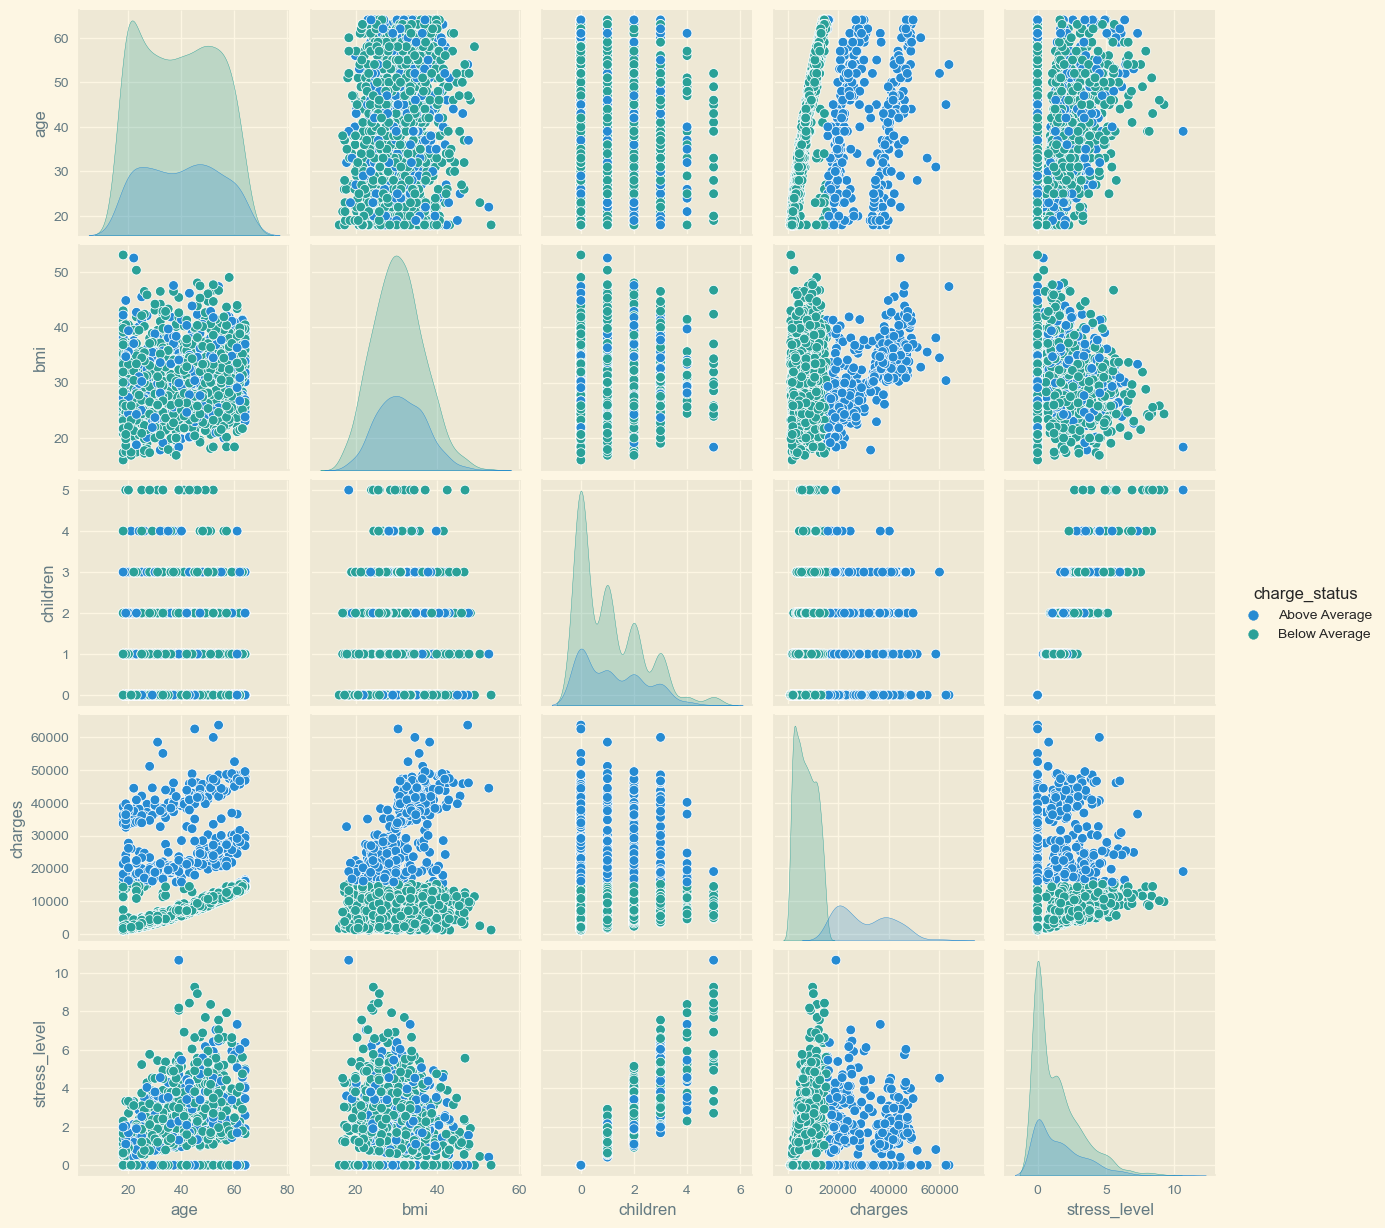

In [109]:
# pd.scatter_matrix(df, figsize=(12, 8))


sns.pairplot(df,hue="charge_status")
plt.show()

<h3> Preprocessing our Data and using Pipelines: </h3>
<a id="preprocess"></a>
In this section we will preprocess our data using what we call <b> Pipelines </b>. So why do we use pipelines? Although, in this example pipelines might not be necessarry if you want to automate various processes for instance, scaling the features, replacing missing values with the median and other processes pipelines are fantastic because they automatize the whole process.We will also use the class CategoricalEncoder from Scikit-Learn, they should already have it as a class but in this case I just copied the class from Scikit-Learn's library. Let's see how it works!

In [117]:
# In this section we will preprocess our data
# First we should split our original data.

from sklearn.model_selection import train_test_split

# Shuffle our dataset before splitting

original_df = original_df.sample(frac=1, random_state=1)

X = original_df.drop("charges", axis=1)
y = original_df["charges"]

# Split into both training and testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [119]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.utils import check_array
from sklearn.preprocessing import LabelEncoder
from scipy import sparse

class CategoricalEncoder(BaseEstimator, TransformerMixin):
    """Encode categorical features as a numeric array.
    The input to this transformer should be a matrix of integers or strings,
    denoting the values taken on by categorical (discrete) features.
    The features can be encoded using a one-hot aka one-of-K scheme
    (``encoding='onehot'``, the default) or converted to ordinal integers
    (``encoding='ordinal'``).
    This encoding is needed for feeding categorical data to many scikit-learn
    estimators, notably linear models and SVMs with the standard kernels.
    Read more in the :ref:`User Guide <preprocessing_categorical_features>`.
    Parameters
    ----------
    encoding : str, 'onehot', 'onehot-dense' or 'ordinal'
        The type of encoding to use (default is 'onehot'):
        - 'onehot': encode the features using a one-hot aka one-of-K scheme
          (or also called 'dummy' encoding). This creates a binary column for
          each category and returns a sparse matrix.
        - 'onehot-dense': the same as 'onehot' but returns a dense array
          instead of a sparse matrix.
        - 'ordinal': encode the features as ordinal integers. This results in
          a single column of integers (0 to n_categories - 1) per feature.
    categories : 'auto' or a list of lists/arrays of values.
        Categories (unique values) per feature:
        - 'auto' : Determine categories automatically from the training data.
        - list : ``categories[i]`` holds the categories expected in the ith
          column. The passed categories are sorted before encoding the data
          (used categories can be found in the ``categories_`` attribute).
    dtype : number type, default np.float64
        Desired dtype of output.
    handle_unknown : 'error' (default) or 'ignore'
        Whether to raise an error or ignore if a unknown categorical feature is
        present during transform (default is to raise). When this is parameter
        is set to 'ignore' and an unknown category is encountered during
        transform, the resulting one-hot encoded columns for this feature
        will be all zeros.
        Ignoring unknown categories is not supported for
        ``encoding='ordinal'``.
    Attributes
    ----------
    categories_ : list of arrays
        The categories of each feature determined during fitting. When
        categories were specified manually, this holds the sorted categories
        (in order corresponding with output of `transform`).
    Examples
    --------
    Given a dataset with three features and two samples, we let the encoder
    find the maximum value per feature and transform the data to a binary
    one-hot encoding.
    >>> from sklearn.preprocessing import CategoricalEncoder
    >>> enc = CategoricalEncoder(handle_unknown='ignore')
    >>> enc.fit([[0, 0, 3], [1, 1, 0], [0, 2, 1], [1, 0, 2]])
    ... # doctest: +ELLIPSIS
    CategoricalEncoder(categories='auto', dtype=<... 'numpy.float64'>,
              encoding='onehot', handle_unknown='ignore')
    >>> enc.transform([[0, 1, 1], [1, 0, 4]]).toarray()
    array([[ 1.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,  0.],
           [ 0.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  0.]])
    See also
    --------
    sklearn.preprocessing.OneHotEncoder : performs a one-hot encoding of
      integer ordinal features. The ``OneHotEncoder assumes`` that input
      features take on values in the range ``[0, max(feature)]`` instead of
      using the unique values.
    sklearn.feature_extraction.DictVectorizer : performs a one-hot encoding of
      dictionary items (also handles string-valued features).
    sklearn.feature_extraction.FeatureHasher : performs an approximate one-hot
      encoding of dictionary items or strings.
    """

    def __init__(self, encoding='onehot', categories='auto', dtype=np.float64,
                 handle_unknown='error'):
        self.encoding = encoding
        self.categories = categories
        self.dtype = dtype
        self.handle_unknown = handle_unknown

    def fit(self, X, y=None):
        """Fit the CategoricalEncoder to X.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_feature]
            The data to determine the categories of each feature.
        Returns
        -------
        self
        """

        if self.encoding not in ['onehot', 'onehot-dense', 'ordinal']:
            template = ("encoding should be either 'onehot', 'onehot-dense' "
                        "or 'ordinal', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.handle_unknown not in ['error', 'ignore']:
            template = ("handle_unknown should be either 'error' or "
                        "'ignore', got %s")
            raise ValueError(template % self.handle_unknown)

        if self.encoding == 'ordinal' and self.handle_unknown == 'ignore':
            raise ValueError("handle_unknown='ignore' is not supported for"
                             " encoding='ordinal'")

        X = check_array(X, dtype=np.object, accept_sparse='csc', copy=True)
        n_samples, n_features = X.shape

        self._label_encoders_ = [LabelEncoder() for _ in range(n_features)]

        for i in range(n_features):
            le = self._label_encoders_[i]
            Xi = X[:, i]
            if self.categories == 'auto':
                le.fit(Xi)
            else:
                valid_mask = np.in1d(Xi, self.categories[i])
                if not np.all(valid_mask):
                    if self.handle_unknown == 'error':
                        diff = np.unique(Xi[~valid_mask])
                        msg = ("Found unknown categories {0} in column {1}"
                               " during fit".format(diff, i))
                        raise ValueError(msg)
                le.classes_ = np.array(np.sort(self.categories[i]))

        self.categories_ = [le.classes_ for le in self._label_encoders_]

        return self

    def transform(self, X):
        """Transform X using one-hot encoding.
        Parameters
        ----------
        X : array-like, shape [n_samples, n_features]
            The data to encode.
        Returns
        -------
        X_out : sparse matrix or a 2-d array
            Transformed input.
        """
        X = check_array(X, accept_sparse='csc', dtype=np.object, copy=True)
        n_samples, n_features = X.shape
        X_int = np.zeros_like(X, dtype=np.int)
        X_mask = np.ones_like(X, dtype=np.bool)

        for i in range(n_features):
            valid_mask = np.in1d(X[:, i], self.categories_[i])

            if not np.all(valid_mask):
                if self.handle_unknown == 'error':
                    diff = np.unique(X[~valid_mask, i])
                    msg = ("Found unknown categories {0} in column {1}"
                           " during transform".format(diff, i))
                    raise ValueError(msg)
                else:
                    # Set the problematic rows to an acceptable value and
                    # continue `The rows are marked `X_mask` and will be
                    # removed later.
                    X_mask[:, i] = valid_mask
                    X[:, i][~valid_mask] = self.categories_[i][0]
            X_int[:, i] = self._label_encoders_[i].transform(X[:, i])

        if self.encoding == 'ordinal':
            return X_int.astype(self.dtype, copy=False)

        mask = X_mask.ravel()
        n_values = [cats.shape[0] for cats in self.categories_]
        n_values = np.array([0] + n_values)
        indices = np.cumsum(n_values)

        column_indices = (X_int + indices[:-1]).ravel()[mask]
        row_indices = np.repeat(np.arange(n_samples, dtype=np.int32),
                                n_features)[mask]
        data = np.ones(n_samples * n_features)[mask]

        out = sparse.csc_matrix((data, (row_indices, column_indices)),
                                shape=(n_samples, indices[-1]),
                                dtype=self.dtype).tocsr()
        if self.encoding == 'onehot-dense':
            return out.toarray()
        else:
            return out

In [121]:
from sklearn.base import BaseEstimator, TransformerMixin

# A class to select numerical or categorical columns 
# since Scikit-Learn doesn't handle DataFrames yet
class DataFrameSelector(BaseEstimator, TransformerMixin):
    def __init__(self, attribute_names):
        self.attribute_names = attribute_names
    def fit(self, X, y=None):
        return self
    def transform(self, X):
        return X[self.attribute_names]

In [123]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import FeatureUnion
import pandas as pd
import numpy as np

# Children as categorical (ordinal variable)
X_train["children"] = X_train["children"].astype("object")

# Separate numerics and categorical values
numerics = X_train.select_dtypes(exclude="object")
categoricals = X_train.select_dtypes(include="object")

# Pipelines
numerical_pipeline = Pipeline([
    ("select_numeric", DataFrameSelector(numerics.columns.tolist())),
    ("std_scaler", StandardScaler()),
])

categorical_pipeline = Pipeline([
    ("select_categorical", DataFrameSelector(categoricals.columns.tolist())),
    ("one_hot_encoder", OneHotEncoder(sparse=False)),  # Use OneHotEncoder
])

main_pipeline = FeatureUnion(transformer_list=[
    ('num_pipeline', numerical_pipeline),
    ('cat_pipeline', categorical_pipeline)
])

# Scale our features from our training data
scaled_xtrain = main_pipeline.fit_transform(X_train)


<h2 align="center">  Statistics: </h2>
<h3>Linear Models: </h3>
<a id="linear_models"></a>
In this section I used the statsmodels library to share with the community some important statistical measures I will give a brief definition to the concepts in which I consider are the most important in this case. <br>
<b> Terms: </b>
<ul> 
    <li><b>Adjusted R-Squared: </b> This tells us how close are our data points to the regression line (our predictions). The higher the adjusted squared, the higher the accuracy of our prediction line. </li>
    <li><b>Skewness:</b> This tells us whether the distribution is symetric (at 0 or closer to 0), Right-Skewed which means that most of the values are to the left (Skewness statistic becomes larger) and Left skewed most observations are to the right (this means that the skewness statistic is in the negative zone.) </li>
    <li><b> Kurtosis: </b> Is a statistical measure that helps us understand how skew is the distribution and the peakedness of our data. In this case we have a kurtosis greater than zero which means that the peak is wider with heavier tails, meaning there are some outliers in the observation. </li>
    <li> <b>Skew:</b>  Our skewness is greater than zero which means that it is positive skew. Meaning that most observations are concentrated in the low section of the distribution.  </li>
    <li><b>Collinearity: </b> Collinearity basically means that when two independent variables are highly correlated, it is hard to determine the real coefficients on each feature. Why is this important? Well, if we want to know how much weight that independent variable has towards predicting a specific value colinearity should be avoided.   </li>
    </ul>
    
    
  <h3>More on R-Square and Adjusted R-Square: </h3>  
  <ul>
    <li><b> What does R-Square assumes?</b> That every independent variable in the model explains the different levels of variations in the dependent variable (including the redundant independent variables.)  The more variables you add to the model, the more the R-Square will increase independently of how much significance the variable adds to the model.</li>
    <li><b>Why Adjusted-R Squared?</b> To make things simple, adjusted-R Squared only uses the variables that adds significance to our model. This is one of the main reasons why we used adjusted R-squared rather than R-squared as a measure of performance of our model.  </li>
</ul>
    
<h3>More on Collinearity: </h3>
<ul> 
    <li><b>Does Collinearity affect the final value of our predictions?</b> The answer is no (well at least most of the time does not affect the value of the predictions) however,  collinearity prevents us from understanding the true coefficients of the independent variables which is important if we want to better understand how much weight the independent variables have towards a dependent variable. </li>
    <li><b> What do we do to avoid collinearity?</b> First step, is to determine which variables are highly correlated and then decide which independent variable to choose for inclusion into our regression model. </li>
    <li><b>Why is determining collinearity important?</b> When we find a high correlation between two features, this assumes that they are measuring the same label (output). So removing one of those features does not have a negative impact in the performance of our model and it makes our model simpler. Collinearity is solved by dropping those features that are highly correlated. </li>
  </ul> 
  
  
 <h3>Formulas: </h3>
<b> R-Squared: </b><br>
$\LARGE R^2 = 1 - \frac{SS Regression} {SS Total}$ <br><br>
where: <br>
SS Regression = Sum Squared Regression Error <br>
SS Total = Sum Squared Total Error  <br><br>

<b>Adjusted-R Squared: </b><br>
$\LARGE R^2 adjusted = 1 - \frac{(1 - R^2) - (N - 1)}{N - p - 1}$ <br><br>

where: <br>
$R^2$ = Sample R-Squared <br>
$p$ = Number of Predictors <br>
$N$ = Total Sample Size <br><br>

<b> Skeweness: </b><br>
Skewness = $\LARGE\frac{\sum(x_i - \overline{x})}{(n - 1)v^\frac{3}{2}}$<br><br>

where: <br>
$\large V = \frac{\sum(x_i - \overline{x})^2}{(n - 1)}$<br>
$\large x $= Predictor variable <br>
$\large n $= Number of Values<br>
$\large\overline {x} $= Sample Mean $


    
 <b>A Special Thanks Note: </b> A special thanks to <b> Piyush Rastogi </b>for bringing the collinearity issue to my attention. 

In [126]:
# Let's create the training set by combining the previous X_train and y_train.
train = X_train.join(y_train, lsuffix='_X_train', rsuffix='_y_train')
test = X_test.join(y_test, lsuffix='_X_test', rsuffix='_y_test')

# Random seed
np.random.seed(42)

# Shuffle Randomly the training set
train = train.sample(frac=1)
train.head()

age     sex     bmi children smoker     region      charges
1313   19  female  34.700        2    yes  southwest  36397.57600
455    59    male  37.400        0     no  southwest  21797.00040
718    51  female  36.670        2     no  northwest  10848.13430
886    57    male  28.975        0    yes  northeast  27218.43725
624    59    male  28.785        0     no  northwest  12129.61415

In [128]:
X_train = sm.add_constant(scaled_xtrain)
y_train = y_train.values

model = sm.OLS(y_train, X_train)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     263.7
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.32e-307
Time:                        11:11:14   Log-Likelihood:                -10842.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1057   BIC:                         2.178e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8579.3174    181.424     47.289      0.0

In [130]:
print('Parameters: ', results.params)
print('R2: ', results.rsquared)

Parameters:  [ 8579.31739424  3697.19316206  2087.99490527  4188.32986008
  4390.98753416   370.12217954   673.2252937   1962.50004862
  1246.42974053  3301.05061561  1025.98951624 -7513.55667918
 16092.87407341  2662.50874357  2405.00515229  1590.3306592
  1921.47283918]
R2:  0.7495781434859005


In [132]:
res = sm.OLS(y_train, X_train).fit()
print(res.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.750
Model:                            OLS   Adj. R-squared:                  0.747
Method:                 Least Squares   F-statistic:                     263.7
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          1.32e-307
Time:                        11:11:19   Log-Likelihood:                -10842.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1057   BIC:                         2.178e+04
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       8579.3174    181.424     47.289      0.0

In [134]:
print('Parameters: ', res.params)
print('Standard errors: ', res.bse)
print('Predicted values: ', res.predict())

Parameters:  [ 8579.31739424  3697.19316206  2087.99490527  4188.32986008
  4390.98753416   370.12217954   673.2252937   1962.50004862
  1246.42974053  3301.05061561  1025.98951624 -7513.55667918
 16092.87407341  2662.50874357  2405.00515229  1590.3306592
  1921.47283918]
Standard errors:  [ 181.42430408  188.94869419  197.68641172  212.29037546  205.62101258
  452.75591745  493.4773964   530.14633973  607.1157003  1231.87562011
 1589.03581224  219.08930891  276.0087508   333.35373174  338.55635858
  335.97529767  328.94141626]
Predicted values:  [ 9515.68435631  9383.8591909   6883.64578641 ...  -270.63280684
 11979.8621903   8007.29077303]


<h3> Dealing with Collinearity </h3>
<a id="collinearity"></a>
<b> What we will do: </b>
<ul>
    <li><b>Remove the stress level feature</b> These two features are highly correlated, doesen't suprise me because stress levels is directly derived from the amount of children a patient has.  Since children was in our original dataframe, we should delete the stress level feature and I am still not sure the stress level feature provides additional insight to the dataset (Still working on my feature engineering skills).</li>
    <li> <b> Adding features manually: </b> We will add features manually into our linear model and see how well it performs, also this will allow us to avoid collinearity </i>
    <li><b>Repetitive Process: </b> I know it is a repetitive process nevertheless, my intent is to show how to avoid collinearity in our model step by step.</li>
    </ul>

Key: The main issue was the creation of the stress level variable which by removing that feature we can guarantee that collinearity is removed from our model.

In [137]:
# Drop the columns we created.

df = df.drop(['weight_condition', 'charge_status', 'age_cat'], axis=1)

In [139]:
# Drop the columns that are highly correlated.
numeric_df = df.select_dtypes(include=[np.number])
corr = numeric_df.corr()
corr

age       bmi  children   charges  stress_level
age           1.000000  0.109272  0.042469  0.299008      0.224857
bmi           0.109272  1.000000  0.012759  0.198341     -0.114539
children      0.042469  0.012759  1.000000  0.067998      0.912752
charges       0.299008  0.198341  0.067998  1.000000      0.094963
stress_level  0.224857 -0.114539  0.912752  0.094963      1.000000

In [141]:
# Drop stress_level
df.drop(['stress_level'], axis=1, inplace=True)

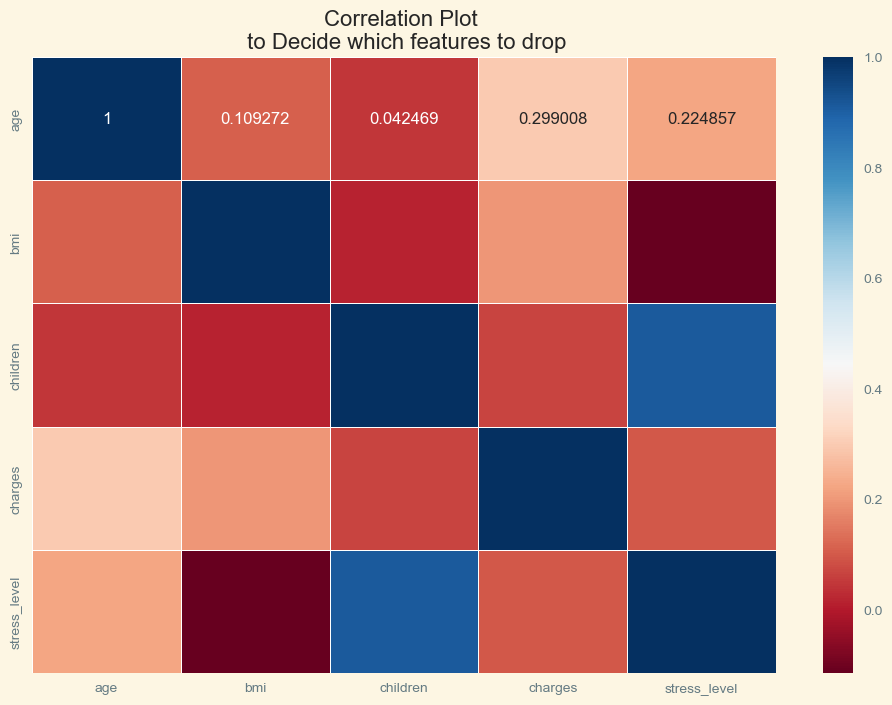

In [143]:
fig = plt.figure(figsize=(12,8))

corr = numeric_df.corr()
ax = sns.heatmap(corr, linewidths=.5, cmap="RdBu", annot=True, fmt="g")
plt.title("Correlation Plot \n to Decide which features to drop", fontsize=16)
plt.show()

<h2 align="center">The Importance of Adding Smoking Status to our Model </h2>
<a id="smoking_status"></a>
<h3>Model #1: Without the Smoking Feature: </h3>
<ul>
    <li><b>A low Adjusted R Squared:</b> We only have an adjusted R Square of 0.116, basically our model is not capturing any trend. </li>
    <li><b>Components of our Model:</b> So only adding the Age and BMI features  to predict how much a Patient will be charged was not enough! </li>
    <li><b>The importance of Exploratory Data Analysis:</b> Remember that in our exploratory analysis we didn't find any significant patterns with this features, so we should expect that model 1 will not perform as we would like to. But what if we add the smoking status? Remember, this feature was extremely useful in determining specific clusters in our sample population.  </li>
</ul>

<h3>Model #2: Adding the Smoking Feature: </h3>
<ul> 
    <li><b>A higher Adjusted R Squared: </b> Just by adding the smoking feature we have an adjusted r squared of 0.747 as opposed to 0.116 without the smoking feature. </li>
    <li><b>Adding the Smoking Feature: </b> Adding the smoking feature permits the model to have a better understanding of certain groups in our sample population. </li>
    </ul>


<b> Note: </b> Will give it some format throughout the weekend just wanted to show you two things: One how to avoid collinearity and two the importance of the smoker status of the patient towards determining how much they will be charged. All the other technicalities regarding the summary of the model I publish it in future kernel updates. 

In [146]:
model_without_smoking = ols("charges ~ bmi + age", data=train).fit()
print(model_without_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.124
Model:                            OLS   Adj. R-squared:                  0.122
Method:                 Least Squares   F-statistic:                     75.34
Date:                Mon, 18 Nov 2024   Prob (F-statistic):           2.48e-31
Time:                        11:11:36   Log-Likelihood:                -11512.
No. Observations:                1070   AIC:                         2.303e+04
Df Residuals:                    1067   BIC:                         2.305e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6945.9964   1938.481     -3.583      0.0

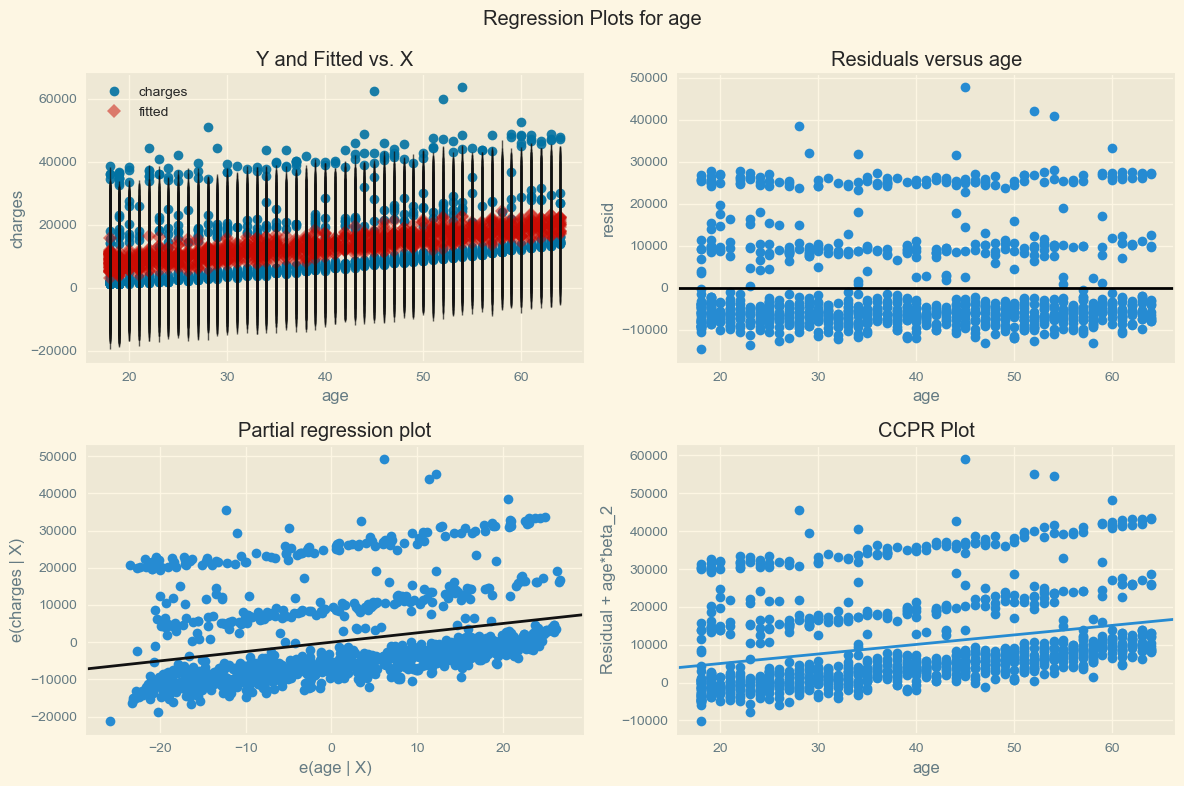

In [148]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_without_smoking, "age", fig=fig)

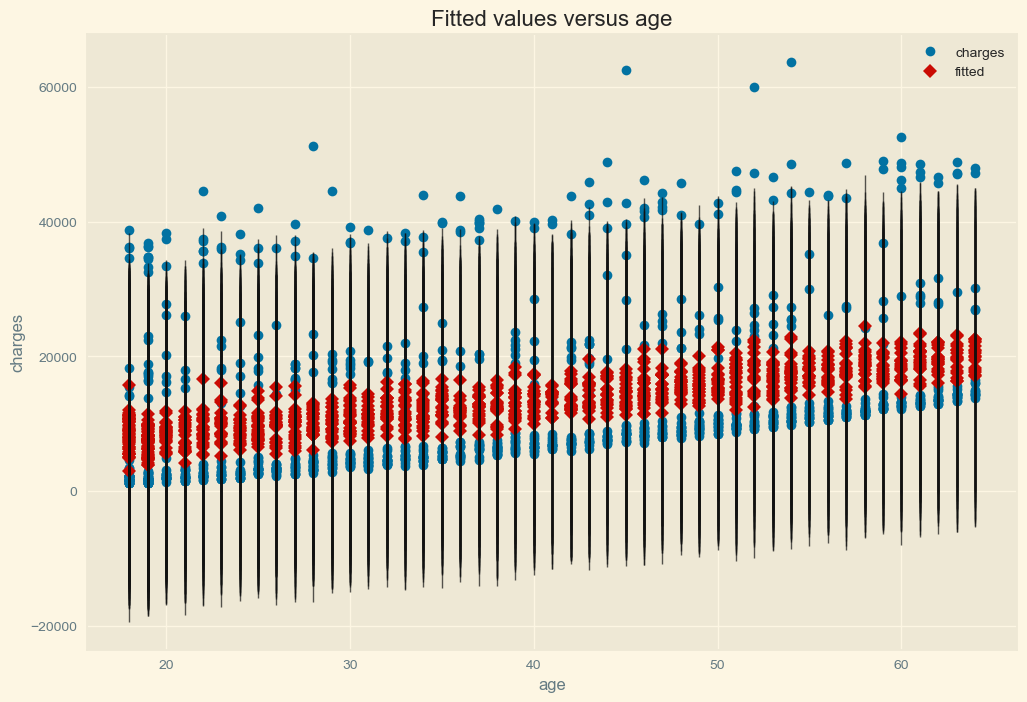

In [150]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_without_smoking, "age", ax=ax)

In [152]:
model_with_smoking = ols("charges ~ smoker + bmi + age", data=train).fit()
print(model_with_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1040.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          5.97e-316
Time:                        11:11:46   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.183e+04   1049.988    -11.265

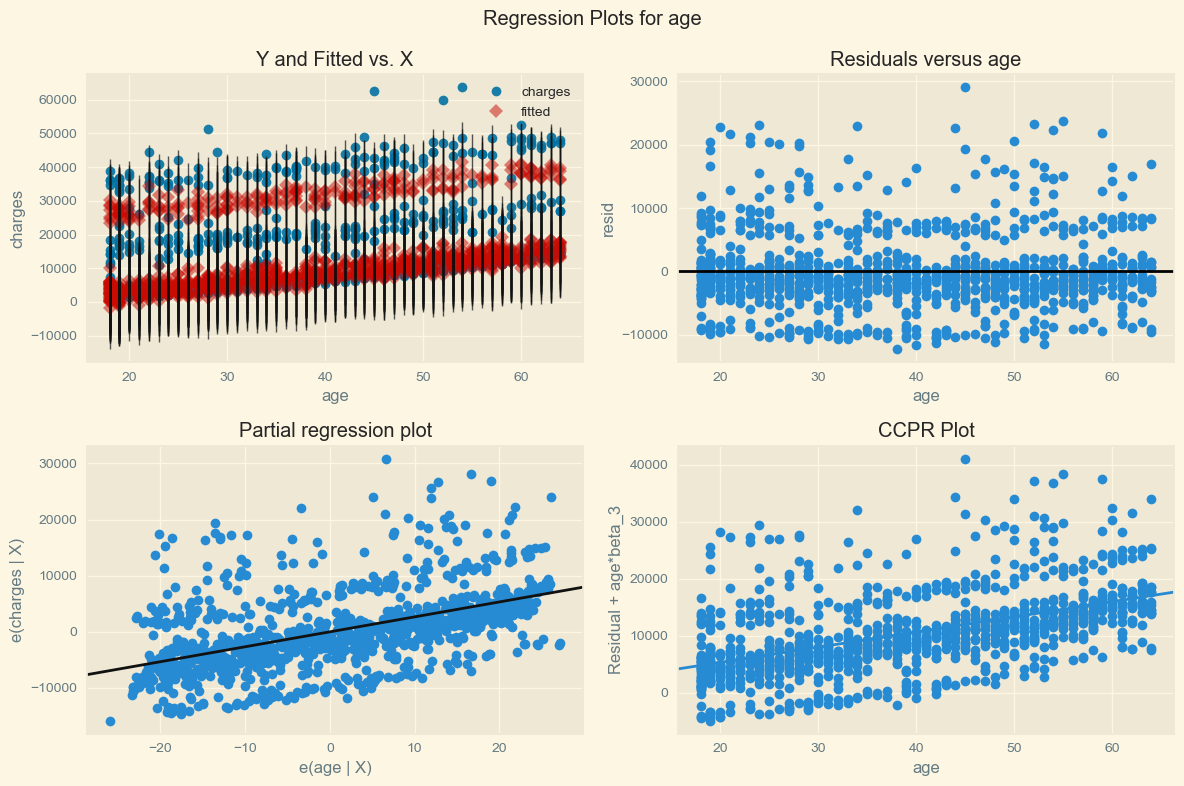

In [154]:
# Age in out X-axis since it has a higher correlation with charges.
fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_with_smoking, "age", fig=fig)

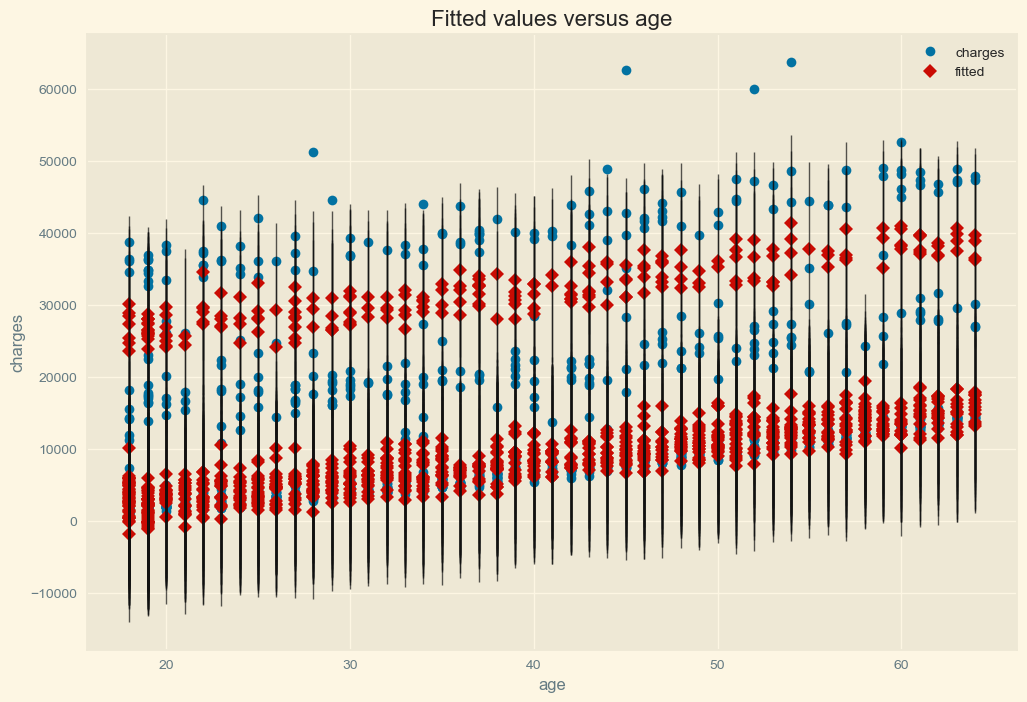

In [156]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_with_smoking, "age", ax=ax)

<h2> Dealing with Skewness </h2>
<ul>
    <li><b>Right-Skewness: </b> If the value is significantly greater than 0, the distribution should be more inclined to be more right skewed.</li>
    <li><b>Symmetric: </b>  The closer the value of our skew is to 0, the more symetric is our distribution.</li>
    <li><b>Left-Skewness:</b> If the value is significantly less than 0, the distribution should be more inclined to be left-skewed. </li>
    </ul>
    
    
 <h3> How to find Skewness in our Distribution: </h3>   
 Coefficient of Skewness =$\LARGE \frac{\overline{x} - z}{\sigma}$<br><br>
 Where: <br>
 $\overline{x}$ = Sample Mean <br>
 z = Mode <br>
 $\sigma$ = Standard Deviation <br><br>
 
 <b> Standard Deviation: </b><br>
 $\LARGE\sigma{} = \sqrt{\frac{\sum{x_i - \overline{x}}}{n - 1}}$ <br>
 Where:<br>
 $\large x_i$ = Observation <br>
 $\large \overline{x}$ = Sample Mean <br>
 $\large n $ = Number of observations <br><br>
 
 <h3> Symmetric Distribution and Dealing with Outliers </h3>
There are many reasons why we would prefer to have a scaled label but one of the main reasons is to scaled down some observations that might be considered outliers. I will further explain this topic but didn't feel like leaving this section empty. Will provide more specific details in the future.

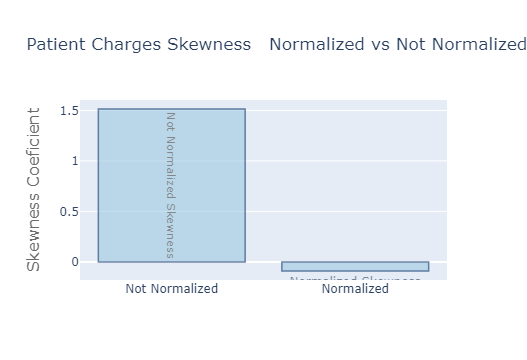

In [159]:
# Let's see the skewness of charges
not_normalized = skew(df['charges'].values.tolist())
normalized = skew(np.log(df['charges'].values.tolist()))


trace0 = go.Bar(
    x=['Not Normalized', 'Normalized'],
    y=[not_normalized, normalized],
    text=['Not Normalized Skewness', 'Normalized Skewness'],
    marker=dict(
        color='rgb(158,202,225)',
        line=dict(
            color='rgb(8,48,107)',
            width=1.5,
        )
    ),
    opacity=0.6
)

data = [trace0]
layout = go.Layout(
    title='Patient Charges Skewness \n Normalized vs Not Normalized',
    yaxis=dict(
        title='Skewness Coeficient',
        titlefont=dict(
            size=16,
            color='rgb(107, 107, 107)'
        )
))

fig = go.Figure(data=data, layout=layout)

iplot(fig, filename='bar-direct-labels')

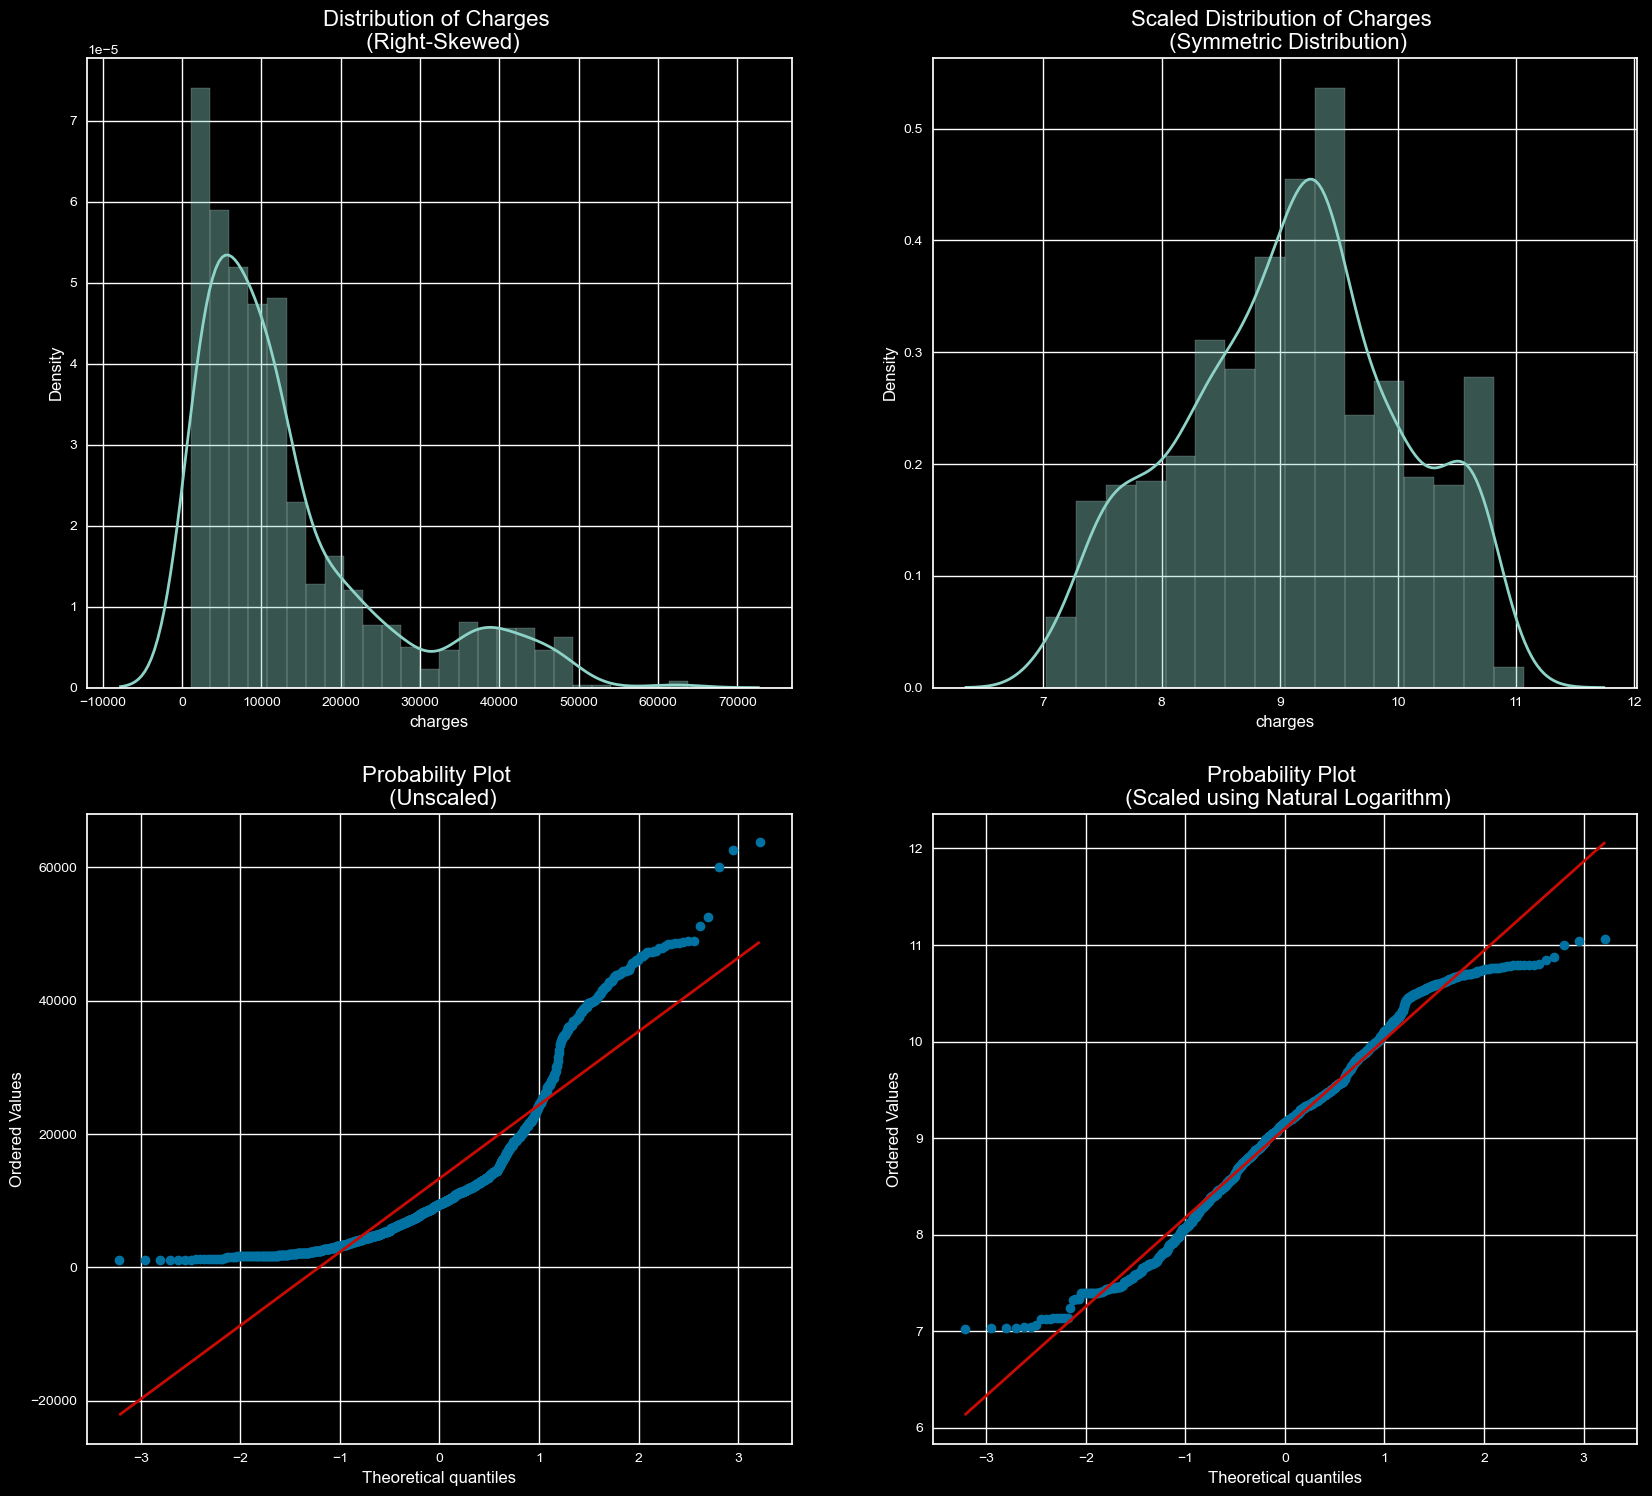

In [161]:
plt.style.use('dark_background')

charges = df['charges'].values

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(20,18)) 

# Distribution of charges
sns.distplot(train['charges'], ax=ax1)
ax1.set_title("Distribution of Charges \n (Right-Skewed)", fontsize=16)


# Scaling charges using a natural logarithm.
sns.distplot(np.log(train['charges']), ax=ax2)
ax2.set_title("Scaled Distribution of Charges \n (Symmetric Distribution)", fontsize=16)

# Quantile plot 
stats.probplot(train["charges"], plot=ax3)
ax3.set_title("Probability Plot \n (Unscaled)", fontsize=16)

stats.probplot(np.log(train["charges"]), plot=ax4)
ax4.set_title("Probability Plot \n (Scaled using Natural Logarithm)", fontsize=16)

plt.show()

### Using Our Model with a Symmetric Patient Charge's Distribution:


In [167]:
train['log_charges'] = np.log(train["charges"])

model_with_logcharges = ols("log_charges ~ smoker + bmi + age", data=train).fit()
print(model_with_smoking.summary())

                            OLS Regression Results                            
Dep. Variable:                charges   R-squared:                       0.745
Model:                            OLS   Adj. R-squared:                  0.745
Method:                 Least Squares   F-statistic:                     1040.
Date:                Mon, 18 Nov 2024   Prob (F-statistic):          5.97e-316
Time:                        11:12:16   Log-Likelihood:                -10851.
No. Observations:                1070   AIC:                         2.171e+04
Df Residuals:                    1066   BIC:                         2.173e+04
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept     -1.183e+04   1049.988    -11.265

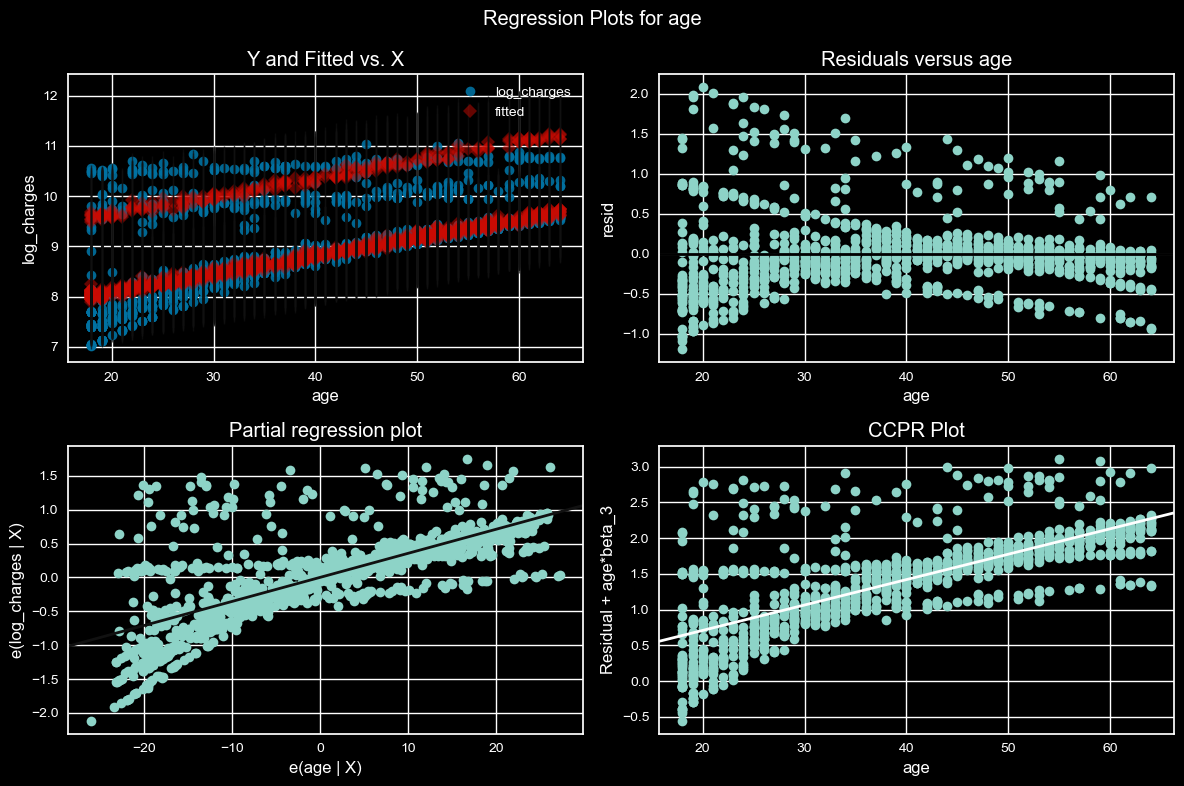

In [169]:
# Using age to predict charges
plt.style.use("dark_background")

fig = plt.figure(figsize=(12,8))
fig = sm.graphics.plot_regress_exog(model_with_logcharges, "age", fig=fig)

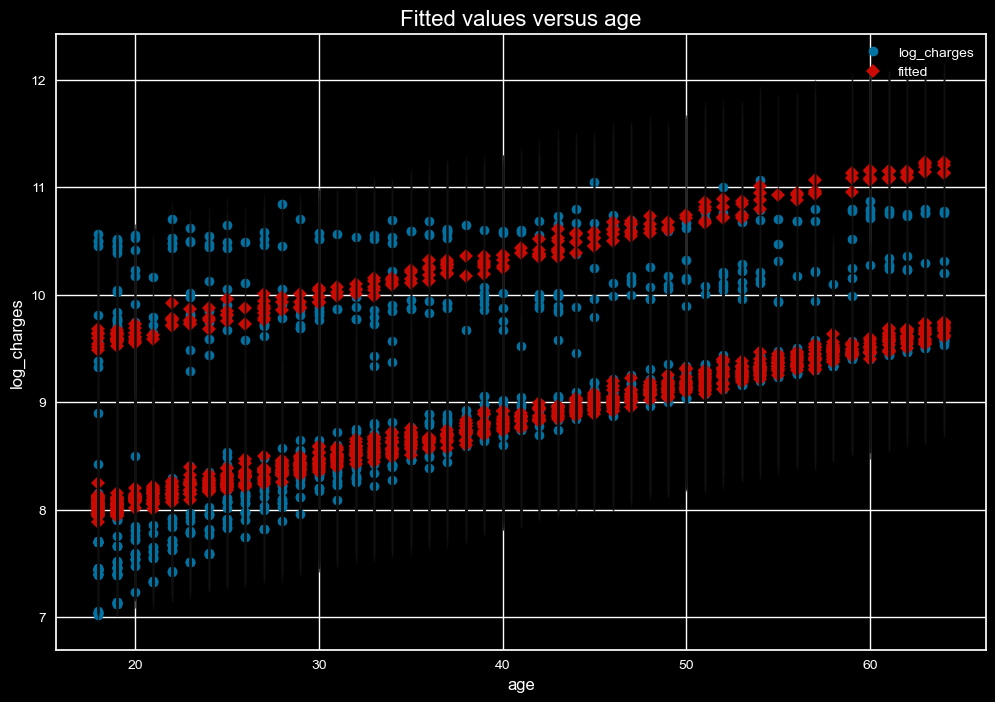

In [171]:
fig, ax = plt.subplots(figsize=(12, 8))
fig = sm.graphics.plot_fit(model_with_logcharges, "age", ax=ax)

In [173]:
df.to_csv("output_file.csv", index=False)